### 10k regressions

## Librariers

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.stattools import adfuller
from statsmodels.regression.linear_model import OLS
from statsmodels.stats.stattools import jarque_bera
from statsmodels.stats.stattools import durbin_watson

import statsmodels.formula.api as smf
import statsmodels.stats.api as sms


from datetime import datetime
import sqlite3
from sqlite3 import Error

## Linear regression model
A LRM describes how a dependent variable y is effected by $K$ independent x-variables and an error term:

\begin{equation}
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 +...+ \beta_K x_K + \epsilon
\end{equation}

In time series data, the observations of a variable are ordered over time. The following notation is used in this chapter: 
- time: $t=1,2,...,T$
- variable $y$ at time $t$: $y_t$
- observations of $y$ over time: $y_1$, $y_2$,...,$y_T$

# Import Data

### Importing Macro-Indicators 
 Indicators: 
 - S&P500
 - Stoxx600
 - MSCI Asia
 - NSDQ
 - Gold
 - WTI
 - NatGas
 - US10Y
 - EU10YT
 - VIX

In [6]:
Indicators = pd.read_excel('Data_returns.xlsx',
                           sep = ';',
                           parse_dates = True, 
                           index_col = 'Date')
Indicators.head()

,S&P500,STOXX600,MSCI AC Asia,NASDAQ,Gold,WTI Cruce Oil,NatGas,US10YT,EU10YT,VIX,S&P500_Log-Return,STOXX600_Log-Return,MSCI AC Asia_Log-Return,NASDAQ_Log-Return,Gold_Log-Return,NatGas_Log-Return,US10YT_Log-Return,EU10YT_Log-Return,VIX_Log-Return
Date,,,,,,,,,,,,,,,,,,,
2022-05-05,4146.87,438.26,167.11,12850.553,1876.8408,108.17,8.783,3.0346,1.043,31.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-04,4300.17,441.37,167.35,13535.709,1880.9229,107.84,8.415,2.9461,0.981,25.42,0.036301,0.007071,0.001435,0.051944,0.002173,-0.042802,-0.029597,-0.061284,-0.204882
2022-05-03,4175.48,446.20,167.89,13089.899,1867.7850,102.53,7.954,2.9790,0.952,29.25,-0.029425,0.010884,0.003222,-0.033490,-0.007009,-0.056341,0.011105,-0.030007,0.140343
2022-05-02,4155.38,443.83,167.99,13075.847,1862.7676,105.18,7.475,2.9768,0.959,32.34,-0.004825,-0.005326,0.000595,-0.001074,-0.002690,-0.062111,-0.000739,0.007326,0.100425
2022-04-29,4131.93,450.39,168.80,12854.804,1896.3959,104.59,7.244,2.9375,0.938,33.40,-0.005659,0.014672,0.004810,-0.017049,0.017892,-0.031391,-0.013290,-0.022141,0.032251


In [7]:
Indicators.isnull().sum()

S&P500                       0
STOXX600                     0
MSCI AC Asia                 0
NASDAQ                       0
Gold                         0
WTI Cruce Oil                0
NatGas                       0
US10YT                       0
EU10YT                       0
VIX                          0
S&P500_Log-Return            1
STOXX600_Log-Return          1
MSCI AC Asia_Log-Return      1
NASDAQ_Log-Return            1
Gold_Log-Return              1
NatGas_Log-Return            1
US10YT_Log-Return            1
EU10YT_Log-Return          773
VIX_Log-Return               1
dtype: int64

In [8]:
#Indicators=Indicators.dropna()

## Stationarity/Non-Sationarity Macro Indicators

- Stationary variables fluctuate around a constant mean, don’t show trends and cycles
- Time series variables are often nonstationary, show trends and cycles

$H_0:$ Non-stationarity

$H_1:$ Stationarity

Formally, a time series variable 𝑦𝑡 is stationary if the following three conditions are satisfied:
1. Mean constant (does not depend on 𝑡)
2. Variance is constant (does not depend on 𝑡)
3. Covariance is constant (not on 𝑡)



We can see that there is non-stationarity for some macro indicators with absolut prices which we found using a Dickey-Fuller test. Furthermore, we have introduced Log-Returns for the variables to see wether the nonstationarity will be reduced.


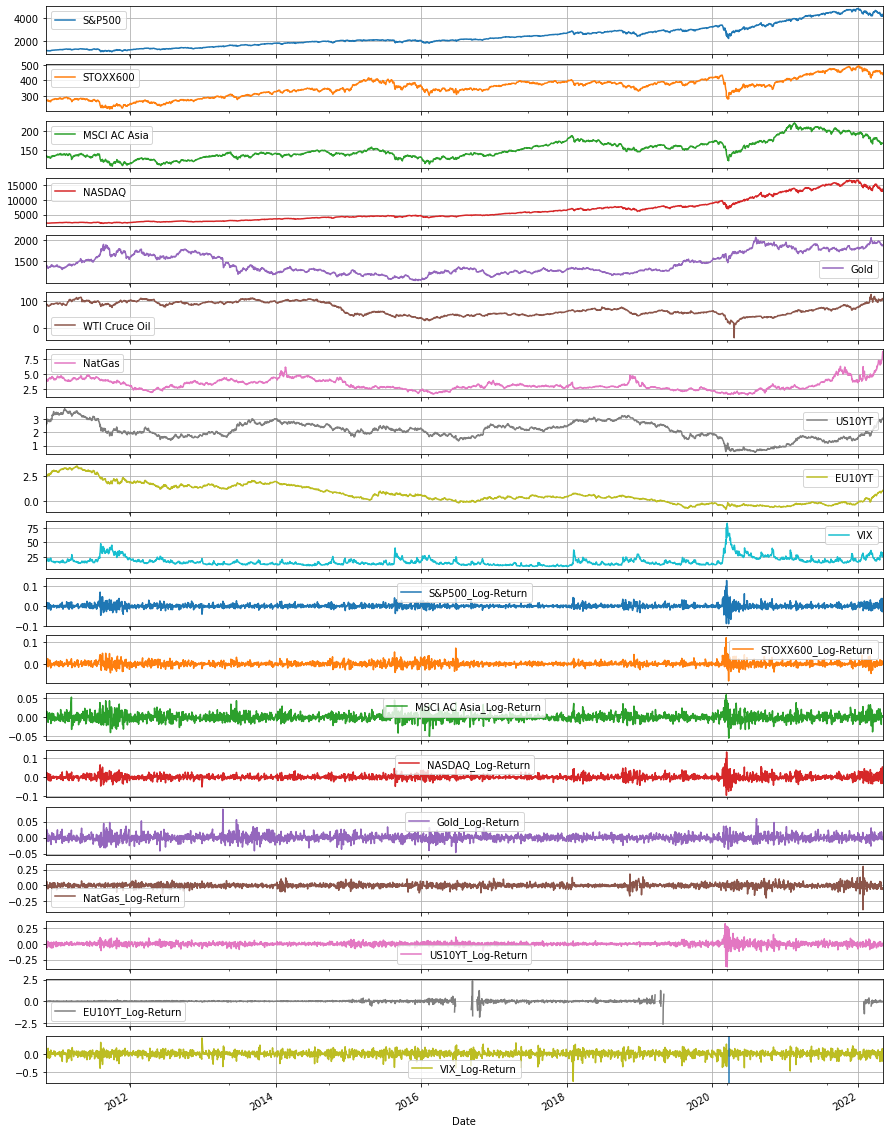

In [9]:
Indicators.plot(figsize=(15, 22), grid=True, subplots=True);
plt.axvline(x='2020-3-24');
#plt.text('2020-3-24', 500, 'Covid-Crisis', fontsize=24, rotation=90)

In [10]:
ts.adfuller(Indicators['S&P500'])

(-2.108255536057963,
 0.24120799293504325,
 28,
 2799,
 {'1%': -3.4326884449020496,
  '5%': -2.862573161055339,
  '10%': -2.567319983412899},
 26338.905834171357)

In [11]:
ts.adfuller(Indicators['STOXX600'])

(-1.6978144309048115,
 0.4322388981901659,
 23,
 2804,
 {'1%': -3.432684271237805,
  '5%': -2.862571317788273,
  '10%': -2.5673190020624705},
 15217.58691472306)

In [12]:
ts.adfuller(Indicators['MSCI AC Asia'])

(-1.730467522985239,
 0.4154869820801577,
 2,
 2825,
 {'1%': -3.4326669033274806,
  '5%': -2.86256364735512,
  '10%': -2.5673149183491266},
 9771.332778721337)

In [13]:
ts.adfuller(Indicators['NASDAQ'])

(-2.4551000418655793,
 0.1267845549420959,
 28,
 2799,
 {'1%': -3.4326884449020496,
  '5%': -2.862573161055339,
  '10%': -2.567319983412899},
 33628.00059871822)

In [14]:
ts.adfuller(Indicators['WTI Cruce Oil'])

(-2.4030853822732956,
 0.1408674753615115,
 28,
 2799,
 {'1%': -3.4326884449020496,
  '5%': -2.862573161055339,
  '10%': -2.567319983412899},
 11744.22755502056)

In [15]:
ts.adfuller(Indicators['Gold'])

(-2.223353802577029,
 0.19787881148303066,
 10,
 2817,
 {'1%': -3.432673489112987,
  '5%': -2.8625665559329367,
  '10%': -2.567316466865495},
 23114.537960507274)

In [16]:
ts.adfuller(Indicators['EU10YT'])

(-0.33421656073976086,
 0.9205164978982705,
 7,
 2820,
 {'1%': -3.4326710150605764,
  '5%': -2.862565463281347,
  '10%': -2.5673158851415923},
 -9874.543240080264)

In [17]:
ts.adfuller(Indicators['US10YT'])

(-2.1286275223087134,
 0.23316019843497116,
 1,
 2826,
 {'1%': -3.432666082728411,
  '5%': -2.8625632849413716,
  '10%': -2.567314725401426},
 -8765.8699810396)

In [18]:
ts.adfuller(Indicators['VIX'])

(-5.29084370835903,
 5.719920431105963e-06,
 13,
 2814,
 {'1%': -3.4326759684453894,
  '5%': -2.862567650915498,
  '10%': -2.567317049830551},
 11398.865097989934)

In [19]:
ts.adfuller(Indicators['NatGas']) 

(-3.621594340316703,
 0.005361359779179029,
 23,
 2804,
 {'1%': -3.432684271237805,
  '5%': -2.862571317788273,
  '10%': -2.5673190020624705},
 -4193.816424268404)

## Stationarity results 

The test unveils that the null hypothesis of non-stationarity can not be rejected for WTI and EU10YT on the 10% significance Level. Thus, we can assume that all other parameters are stationary

## Test of different approaches to reduce non-stationarity.


We compared different sets of approaches to try to reduce even more non-stationarity and illustrate our approach. 

In [20]:
ts.adfuller(Indicators['S&P500_Log-Return'][1:]) 

(-11.7353886591086,
 1.3114993588129872e-21,
 27,
 2799,
 {'1%': -3.4326884449020496,
  '5%': -2.862573161055339,
  '10%': -2.567319983412899},
 -17502.5811813801)

In [21]:
ts.adfuller(Indicators['STOXX600_Log-Return'][1:]) 

(-12.145213022727168,
 1.6166251488758877e-22,
 22,
 2804,
 {'1%': -3.432684271237805,
  '5%': -2.862571317788273,
  '10%': -2.5673190020624705},
 -17356.0555911322)

In [22]:
ts.adfuller(Indicators['MSCI AC Asia_Log-Return'][1:]) 

(-26.89498403277025,
 0.0,
 3,
 2823,
 {'1%': -3.4326685462713105,
  '5%': -2.862564372953293,
  '10%': -2.567315304654884},
 -18122.42191446231)

In [23]:
ts.adfuller(Indicators['NASDAQ_Log-Return'][1:]) 

(-15.464058375165171,
 2.682444962513861e-28,
 12,
 2814,
 {'1%': -3.4326759684453894,
  '5%': -2.862567650915498,
  '10%': -2.567317049830551},
 -16568.470240480572)

In [24]:
ts.adfuller(Indicators['Gold_Log-Return'][1:]) 

(-52.813875611860055,
 0.0,
 0,
 2826,
 {'1%': -3.432666082728411,
  '5%': -2.8625632849413716,
  '10%': -2.567314725401426},
 -17862.11101749764)

In [25]:
# ts.adfuller(Indicators['EU10YT_Log-Return'][1:]) --> Not possible due to negativ values!

In [26]:
ts.adfuller(Indicators['US10YT_Log-Return'][1:]) 

(-8.682631176091252,
 4.245398313710686e-14,
 26,
 2800,
 {'1%': -3.4326876089756286,
  '5%': -2.8625727918750004,
  '10%': -2.567319786862245},
 -11536.030960916756)

In [27]:
ts.adfuller(Indicators['NatGas_Log-Return'][1:]) 

(-12.178287391302188,
 1.3700924231321878e-22,
 22,
 2804,
 {'1%': -3.432684271237805,
  '5%': -2.862571317788273,
  '10%': -2.5673190020624705},
 -11335.652173985753)

In [28]:
ts.adfuller(Indicators['VIX_Log-Return'][1:]) 

(-17.48184246831133,
 4.484930537602211e-30,
 12,
 2814,
 {'1%': -3.4326759684453894,
  '5%': -2.862567650915498,
  '10%': -2.567317049830551},
 -6198.498286210033)

## First differences for EU10YT and WTI Crude Oil

In [29]:
Indicators['EU10YT_delta']= Indicators['EU10YT'] - Indicators['EU10YT'].shift(periods = 1)
Indicators['WTI Crude Oil_delta']= Indicators['WTI Cruce Oil'] - Indicators['WTI Cruce Oil'].shift(periods = 1)

In [30]:
ts.adfuller(Indicators['EU10YT_delta'][1:])

(-21.255809835306007,
 0.0,
 6,
 2820,
 {'1%': -3.4326710150605764,
  '5%': -2.862565463281347,
  '10%': -2.5673158851415923},
 -9872.939262930136)

In [31]:
ts.adfuller(Indicators['WTI Crude Oil_delta'][1:])

(-9.12613225491371,
 3.1101405514226692e-15,
 27,
 2799,
 {'1%': -3.4326884449020496,
  '5%': -2.862573161055339,
  '10%': -2.567319983412899},
 11744.134480239667)

#### Our new dataset contains now the following parameters with log Return except for EU10YT and WTI Crude Oil:

- EU10YT_delta
- US10YT
- NatGas
- MSCI AC Asia
- Gold
- Stoxx600
- S&P500
- Nasdaq
- WTI Crude Oil_delta
- VIX



In [32]:
#Indicators.to_excel('MACRO22.xlsx')

In [64]:
Indicators = pd.read_excel('MACRO22.xlsx',
                           sep = ';',
                           parse_dates = True, 
                           index_col = 'Date')


In [65]:
Indicators.head()

,S&P500,STOXX600,MSCI AC Asia,NASDAQ,Gold,NatGas,US10YT,VIX,EU10YT,WTI Crude Oil
Date,,,,,,,,,,
2022-05-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-04,0.036301,0.007071,0.001435,0.051944,0.002173,-0.042802,-0.029597,-0.204882,-0.062,-0.33
2022-05-03,-0.029425,0.010884,0.003222,-0.033490,-0.007009,-0.056341,0.011105,0.140343,-0.029,-5.31
2022-05-02,-0.004825,-0.005326,0.000595,-0.001074,-0.002690,-0.062111,-0.000739,0.100425,0.007,2.65
2022-04-29,-0.005659,0.014672,0.004810,-0.017049,0.017892,-0.031391,-0.013290,0.032251,-0.021,-0.59


In [66]:
Indicators.isnull().sum()

S&P500           1
STOXX600         1
MSCI AC Asia     1
NASDAQ           1
Gold             1
NatGas           1
US10YT           1
VIX              1
EU10YT           1
WTI Crude Oil    1
dtype: int64

In [67]:
Indicators = Indicators.dropna(how="any")

Text(2020-3-24, 500, 'Covid-Crisis')

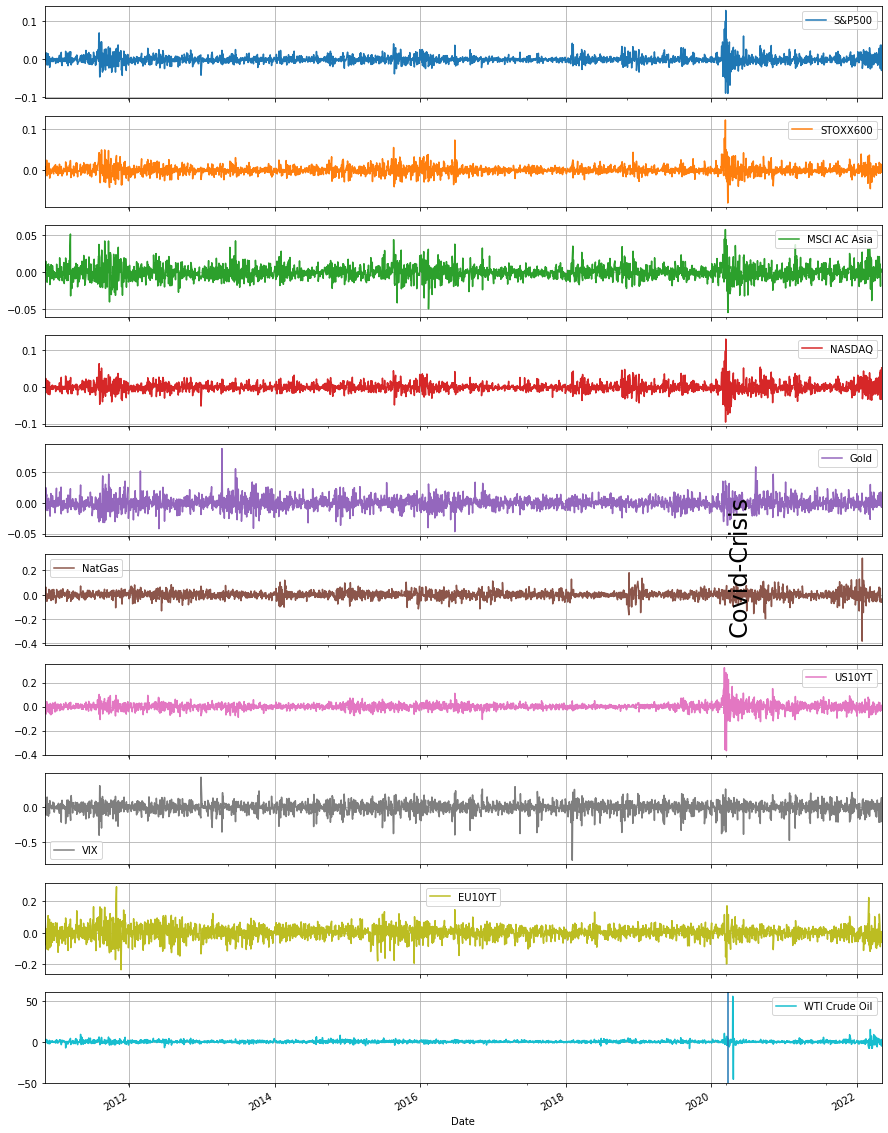

In [68]:
Indicators.plot(figsize=(15, 22), grid=True, subplots=True);
plt.axvline(x='2020-3-24');
plt.text('2020-3-24', 500, 'Covid-Crisis', fontsize=24, rotation=90)

### Conclusion Stationarity for Macro-Indicators.

$H_0:$ Non-stationarity

$H_1:$ Stationarity

We can reject $H_0$ for any independent variable. The macroeconomic variables are stationary. The plot represents the different paremeters with the returns. It is worth noting that during the Covid crisis, the market as a whole declined sharply. 

## --------------------------------------------------------------------------------------------------------

## Importing Cryptocurrencies

 - Bitcoin/BTC
 - Litecoin/LTC
 - Ethereum/ETH
 - Binance/BNB
 - Ripple/XRP
 - Cardano/ADA
 - Dogecoin/DOGE
 - Chainlink/LINK
 - Stellar/XLM




In [37]:
Crypto = pd.read_excel('Crypto_Data_returns.xlsx',
                       sep = ';',
                       parse_dates = True, 
                       index_col = 'Date')
Crypto.tail()

,BTC,ETH,BNB,XRP,ADA,DOGE,TRX,LTC,LINK,XLM,ETH_Return,BNB_Return,XRP_Return,ADA_Return,DOGE_Return,TRX_Return,LTC_Return,LINK_Return,XLM_Return,BTC_Return
Date,,,,,,,,,,,,,,,,,,,,
2017-11-13,6559.490234,316.716003,1.68662,0.203442,0.025808,0.001211,0.002112,61.396500,0.183071,0.030656,-0.063948,0.057371,-0.030893,-0.016219,0.022548,-0.162637,-0.020683,-0.027174,-0.171026,-0.011559
2017-11-12,5950.069824,307.907990,1.51969,0.197339,0.023977,0.001038,0.001783,59.005402,0.170898,0.028182,-0.028204,-0.104220,-0.030458,-0.073589,-0.154151,-0.169338,-0.039724,-0.068807,-0.084145,-0.097510
2017-11-11,6357.600098,314.681000,1.67047,0.210430,0.027437,0.001201,0.002003,62.303299,0.179770,0.033053,0.021758,0.094599,0.064230,0.134797,0.145859,0.116349,0.054385,0.050611,0.159429,0.066248
2017-11-10,6618.140137,299.252991,1.79684,0.206483,0.027119,0.001163,0.002013,59.260101,0.187602,0.033073,-0.050270,0.072925,-0.018935,-0.011658,-0.032152,0.004980,-0.050078,0.042644,0.000605,0.040163
2017-11-09,7143.580078,320.884003,1.99077,0.217488,0.032053,0.001415,0.002344,64.269699,0.223969,0.039946,0.069790,0.102492,0.051926,0.167156,0.196127,0.152233,0.081152,0.177185,0.188811,0.076400


In [38]:
Crypto.isnull().sum()

BTC            0
ETH            0
BNB            0
XRP            0
ADA            0
DOGE           0
TRX            0
LTC            0
LINK           0
XLM            0
ETH_Return     1
BNB_Return     1
XRP_Return     1
ADA_Return     1
DOGE_Return    1
TRX_Return     1
LTC_Return     1
LINK_Return    1
XLM_Return     1
BTC_Return     1
dtype: int64

In [39]:
Crypto = Crypto.dropna(how="any")

## Stationarity/Non-Stationarity Crypto


We can see that there is non-stationarity for some macro indicators with absolut prices which we found using a Dickey-Fuller test. Furthermore, we have introduced Log-Returns for the variables to see wether the nonstationarity will be reduced.


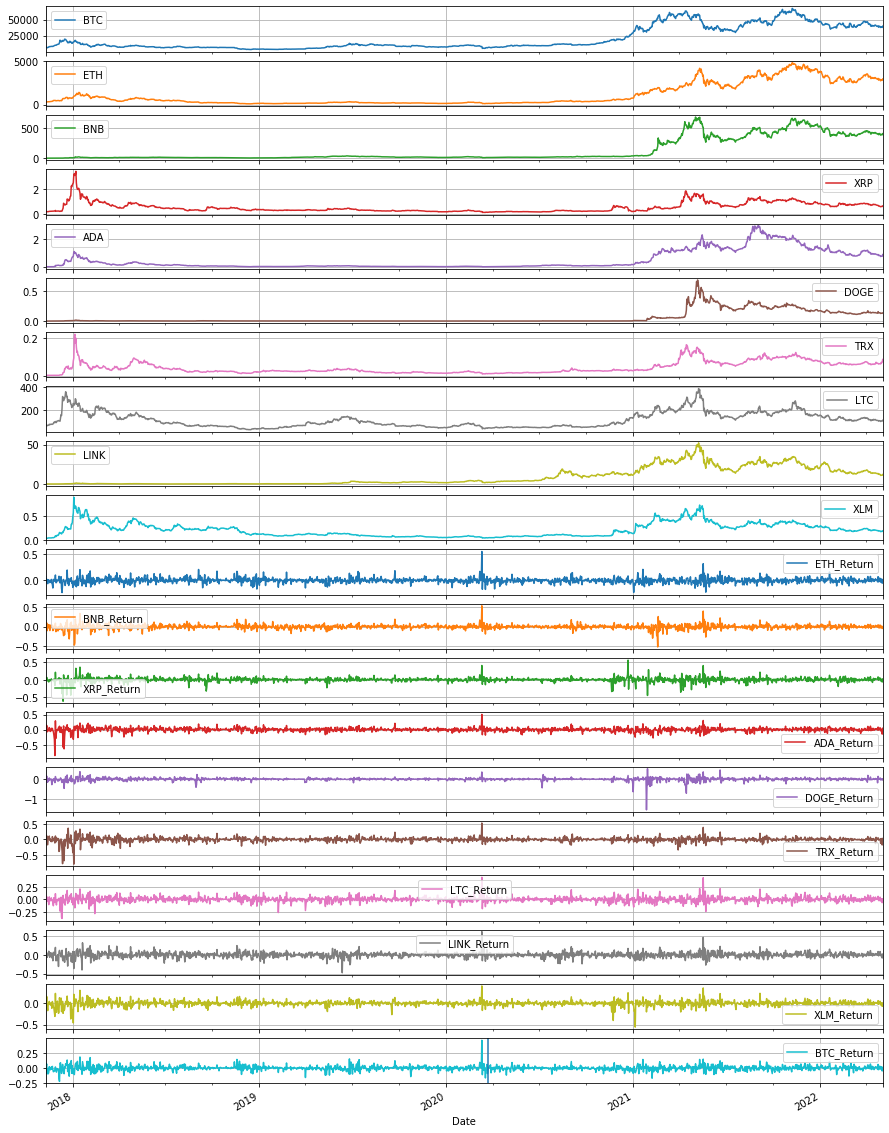

In [40]:

Crypto.plot(figsize=(15, 22), grid=True, subplots=True);
plt.axvline(x='2020-3-24');



In [41]:
ts.adfuller(Crypto['BTC'])

(-1.4373922227318336,
 0.5642244219131894,
 24,
 1613,
 {'1%': -3.4344105934445004,
  '5%': -2.8633335153825383,
  '10%': -2.5677248304249916},
 26938.525043170343)

In [42]:
ts.adfuller(Crypto['BTC_Return'])

(-28.033826878706968,
 0.0,
 1,
 1636,
 {'1%': -3.4343534169127015,
  '5%': -2.8633082781047787,
  '10%': -2.5677113918048073},
 -5698.677363330715)

In [43]:
ts.adfuller(Crypto['LTC'])

(-2.698754061221983,
 0.0742541191299006,
 25,
 1612,
 {'1%': -3.4344131164513874,
  '5%': -2.8633346290071326,
  '10%': -2.5677254234217317},
 11535.924644185627)

In [44]:
ts.adfuller(Crypto['LTC_Return'])

(-15.102926724064748,
 7.893208464351527e-28,
 5,
 1632,
 {'1%': -3.434363244707632,
  '5%': -2.8633126160514863,
  '10%': -2.567713701716287},
 -4682.998221429236)

In [45]:
ts.adfuller(Crypto['ETH'])

(-1.5735784779617104,
 0.49685086219296265,
 17,
 1620,
 {'1%': -3.4343930197503107,
  '5%': -2.8633257585414,
  '10%': -2.567720699969517},
 18646.387436868878)

In [46]:
ts.adfuller(Crypto['ETH_Return'])

(-12.062033447739127,
 2.4567238210577813e-22,
 9,
 1628,
 {'1%': -3.4343731208729635,
  '5%': -2.8633169753343646,
  '10%': -2.5677160229913856},
 -4961.823715340222)

In [47]:
ts.adfuller(Crypto['XRP'])

(-3.6726558612354894,
 0.004514633812126522,
 23,
 1614,
 {'1%': -3.434408073569016,
  '5%': -2.863332403139172,
  '10%': -2.567724238163897},
 -4623.566885431426)

In [48]:
ts.adfuller(Crypto['XRP_Return'])

(-8.69842997148593,
 3.8677727835191474e-14,
 17,
 1620,
 {'1%': -3.4343930197503107,
  '5%': -2.8633257585414,
  '10%': -2.567720699969517},
 -4177.560339388034)

In [49]:
ts.adfuller(Crypto['ADA'])

(-1.7471778282365455,
 0.40698345601688385,
 22,
 1615,
 {'1%': -3.4344055568191085,
  '5%': -2.8633312922744665,
  '10%': -2.5677236466370807},
 -5047.451874732913)

In [50]:
ts.adfuller(Crypto['ADA_Return'])

(-6.310044555521699,
 3.251422919708725e-08,
 18,
 1619,
 {'1%': -3.434395520959224,
  '5%': -2.8633268625511046,
  '10%': -2.5677212878453477},
 -4041.735153490823)

In [51]:
ts.adfuller(Crypto['DOGE'])

(-2.3670997990880926,
 0.15123832593918674,
 25,
 1612,
 {'1%': -3.4344131164513874,
  '5%': -2.8633346290071326,
  '10%': -2.5677254234217317},
 -9757.744095800423)

In [52]:
ts.adfuller(Crypto['DOGE_Return'])

(-21.224560848747593,
 0.0,
 2,
 1635,
 {'1%': -3.4343558693461547,
  '5%': -2.8633093605997613,
  '10%': -2.567711968221904},
 -3541.3182725319657)

In [53]:
ts.adfuller(Crypto['TRX'])

(-2.66596049801794,
 0.08011606649055181,
 23,
 1614,
 {'1%': -3.434408073569016,
  '5%': -2.863332403139172,
  '10%': -2.567724238163897},
 -12629.493300931577)

In [54]:
ts.adfuller(Crypto['TRX_Return'])

(-6.641857931241233,
 5.3849341191732786e-09,
 25,
 1612,
 {'1%': -3.4344131164513874,
  '5%': -2.8633346290071326,
  '10%': -2.5677254234217317},
 -3894.213333648948)

In [55]:
ts.adfuller(Crypto['LINK'])

(-1.4311235760715264,
 0.5672675165676315,
 21,
 1616,
 {'1%': -3.434403043188966,
  '5%': -2.863330182785859,
  '10%': -2.567723055843177},
 4632.841704694274)

In [56]:
ts.adfuller(Crypto['LINK_Return'])

(-18.759684219933565,
 2.0265071747058283e-30,
 3,
 1634,
 {'1%': -3.434358324786104,
  '5%': -2.8633104444209136,
  '10%': -2.5677125453453167},
 -3856.4407353279857)

In [57]:
ts.adfuller(Crypto['XLM'])

(-2.2628439205830104,
 0.18423162049605446,
 18,
 1619,
 {'1%': -3.434395520959224,
  '5%': -2.8633268625511046,
  '10%': -2.5677212878453477},
 -7995.672974787931)

In [58]:
ts.adfuller(Crypto['XLM_Return'])

(-21.00387616541291,
 0.0,
 2,
 1635,
 {'1%': -3.4343558693461547,
  '5%': -2.8633093605997613,
  '10%': -2.567711968221904},
 -4291.461016423691)

Our new dataset contains the Log_Return of the following cryptocurrencies:
 - Bitcoin/BTC
 - Litecoin/LTC
 - Ethereum/ETH
 - Binance/BNB
 - Ripple/XRP
 - Cardano/ADA
 - Dogecoin/DOGE
 - Chainlink/LINK
 - Stellar/XLM



In [59]:
Crypto = pd.read_excel('CRYPTO22.xlsx',
                       sep = ';',
                       parse_dates = True, 
                       index_col = 'Date')

In [60]:
Crypto.head()

,ETH_Return,BNB_Return,XRP_Return,ADA_Return,DOGE_Return,TRX_Return,LTC_Return,LINK_Return,XLM_Return,BTC_Return
Date,,,,,,,,,,
2022-05-04,0.005866,-0.004825,0.015211,0.041896,0.010384,0.029092,0.011763,0.015968,0.004747,0.005272
2022-05-03,-0.054928,-0.048425,-0.066554,-0.151115,-0.047414,-0.175917,-0.067450,-0.088094,-0.069918,-0.050313
2022-05-02,0.026215,0.016025,0.015454,0.013376,0.010889,-0.050278,0.013500,0.005144,0.009248,0.020422
2022-05-01,-0.010432,0.001568,-0.010515,0.011216,0.013917,0.030311,-0.012567,0.011848,0.013063,-0.001565
2022-04-30,-0.035113,-0.032590,-0.034738,-0.043554,-0.040078,-0.121926,-0.033436,-0.028239,-0.038288,-0.019801


In [61]:
Crypto.isnull().sum()

ETH_Return     0
BNB_Return     0
XRP_Return     0
ADA_Return     0
DOGE_Return    0
TRX_Return     0
LTC_Return     0
LINK_Return    0
XLM_Return     0
BTC_Return     0
dtype: int64

Text(2020-3-24, 5, 'Covid-Crisis')

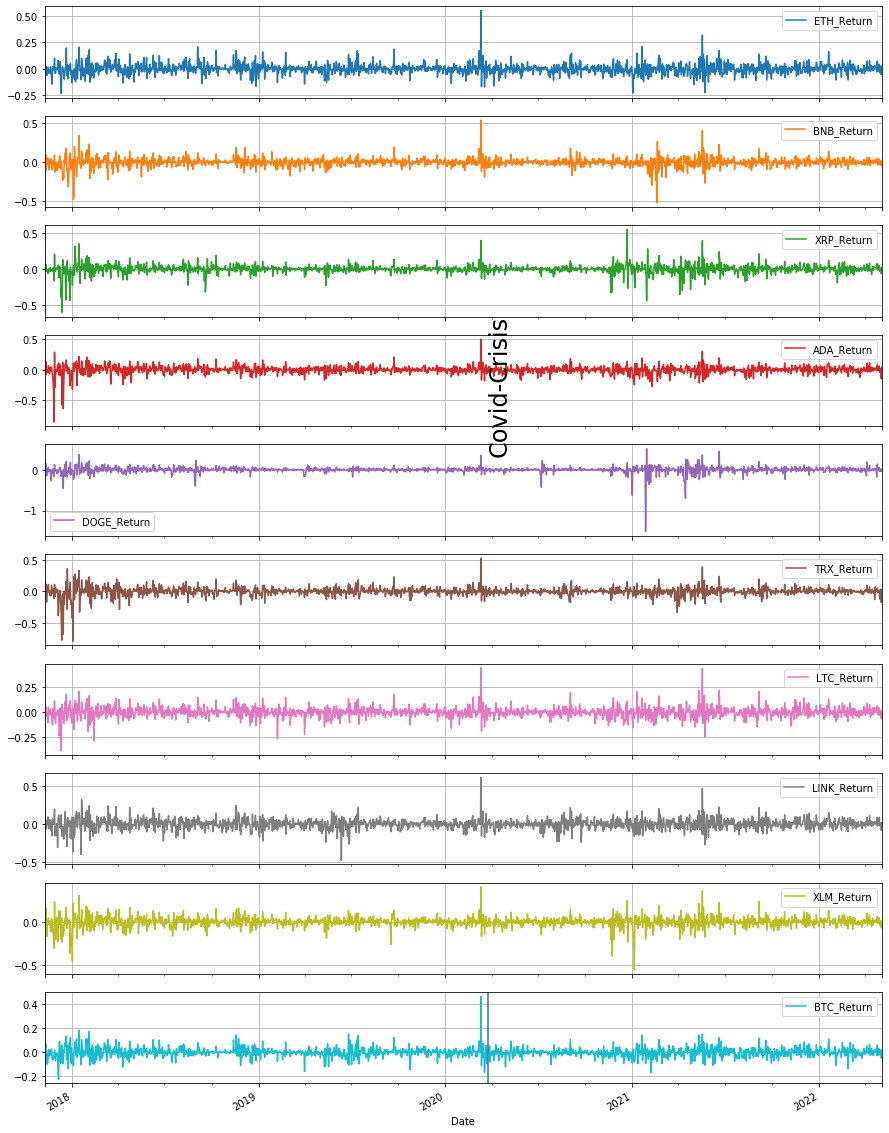

In [62]:
Crypto.plot(figsize=(15, 22), grid=True, subplots=True);
plt.axvline(x='2020-3-24');
plt.text('2020-3-24', 5, 'Covid-Crisis', fontsize=24, rotation=90)

### Conclusion Stationarity for Cryptocurrencies

The test shows that the $H_0$ hypothesis of non-stationarity for cryptocurrencies with absolut prices can be rejected only for XRP and LTC at the 10% significance level.

With the calculated Log-Returns, we can reject the $H_0$ hypothesis of non-stationarity at the 1% significance level. 

## --------------------------------------------------------------------------------------------------------

# Time Series LRM-Diagnostics

1. Linearity in parameters, stationary dependent and independent variables
2. Error term 𝜀𝑡 uncorrelated with current and past values of the independent variables
3. No perfect multicollinearity
4. Homoscedasticity: 𝑉𝑎𝑟 𝜀 = 𝜎 2 𝑡𝜀
5. No autocorrelation: 𝐶𝑜𝑣 𝜀𝑡 , 𝜀𝑡−1 = 𝐶𝑜𝑟𝑟 𝜀𝑡 , 𝜀𝑡−1 = 0 for all 𝑡
6. Normally distributed error term (Gaussian White Noise error term): 𝜀 ~N(0, 𝜎2)

## No perfect multicollinearity
Perfect multicollinearity can be checked by calculating the sample correlation between the independent variables $x_1$, $x_2$ and $x_3$:

- 1. Perfect multicollinearity: perfectly correlated independent variables (correlation coefficient ±1), can be avoided with careful attention to model specification

- 2. High multicollinearity: highly correlated independent variables, common in practice

In [69]:
Indicators.corr()

,S&P500,STOXX600,MSCI AC Asia,NASDAQ,Gold,NatGas,US10YT,VIX,EU10YT,WTI Crude Oil
S&P500,1.000000,0.628890,0.294838,0.925274,0.002859,0.040323,0.474158,-0.756861,0.235933,0.195501
STOXX600,0.628890,1.000000,0.451387,0.529212,-0.049848,0.036864,0.377773,-0.500105,0.340573,0.151845
MSCI AC Asia,0.294838,0.451387,1.000000,0.269737,0.117941,0.006024,0.112974,-0.200828,0.070983,0.109902
NASDAQ,0.925274,0.529212,0.269737,1.000000,0.007568,0.016806,0.365634,-0.724848,0.170039,0.140016
Gold,0.002859,-0.049848,0.117941,0.007568,1.000000,0.004234,-0.237586,0.006601,-0.146618,0.119983
NatGas,0.040323,0.036864,0.006024,0.016806,0.004234,1.000000,0.068363,-0.023007,0.032542,0.039929
US10YT,0.474158,0.377773,0.112974,0.365634,-0.237586,0.068363,1.000000,-0.314292,0.522022,0.137982
VIX,-0.756861,-0.500105,-0.200828,-0.724848,0.006601,-0.023007,-0.314292,1.000000,-0.199925,-0.189287
EU10YT,0.235933,0.340573,0.070983,0.170039,-0.146618,0.032542,0.522022,-0.199925,1.000000,0.112606
WTI Crude Oil,0.195501,0.151845,0.109902,0.140016,0.119983,0.039929,0.137982,-0.189287,0.112606,1.000000


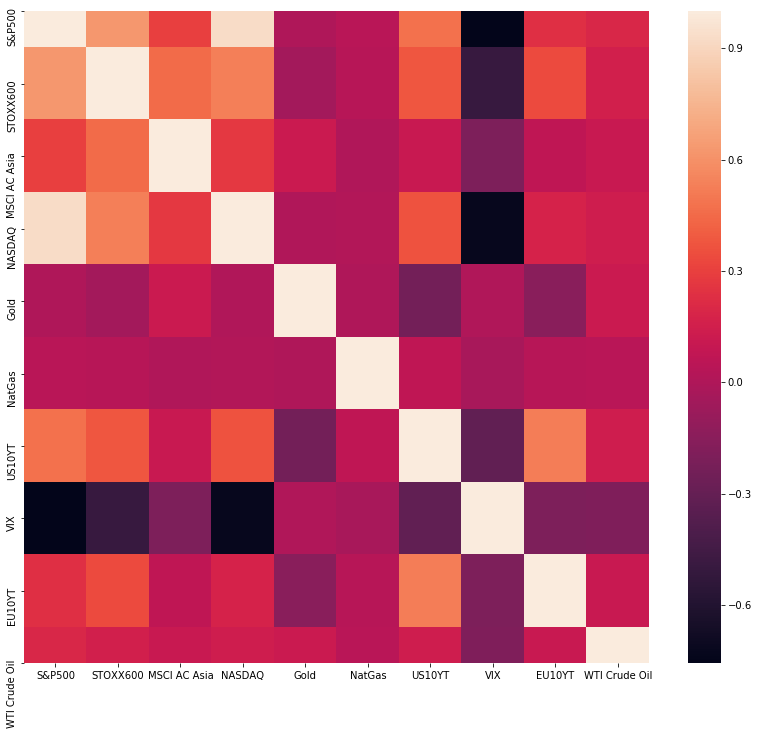

In [70]:
Correlation=Indicators.corr()
plt.figure(figsize=(14,12))

sns.heatmap(Correlation,
           xticklabels=Correlation.columns.values,
           yticklabels=Correlation.columns.values);


In [71]:
Crypto.corr()

,ETH_Return,BNB_Return,XRP_Return,ADA_Return,DOGE_Return,TRX_Return,LTC_Return,LINK_Return,XLM_Return,BTC_Return
ETH_Return,1.000000,0.655125,0.640438,0.668603,0.448168,0.621239,0.821772,0.648765,0.670667,0.778168
BNB_Return,0.655125,1.000000,0.496829,0.531885,0.369960,0.490399,0.634339,0.528610,0.545493,0.657038
XRP_Return,0.640438,0.496829,1.000000,0.625779,0.388355,0.564723,0.626822,0.498652,0.705763,0.544096
ADA_Return,0.668603,0.531885,0.625779,1.000000,0.429999,0.567330,0.631580,0.535164,0.746823,0.601641
DOGE_Return,0.448168,0.369960,0.388355,0.429999,1.000000,0.398470,0.475433,0.372986,0.453771,0.473867
TRX_Return,0.621239,0.490399,0.564723,0.567330,0.398470,1.000000,0.578490,0.501454,0.545944,0.597086
LTC_Return,0.821772,0.634339,0.626822,0.631580,0.475433,0.578490,1.000000,0.569302,0.647942,0.757434
LINK_Return,0.648765,0.528610,0.498652,0.535164,0.372986,0.501454,0.569302,1.000000,0.555552,0.557448
XLM_Return,0.670667,0.545493,0.705763,0.746823,0.453771,0.545944,0.647942,0.555552,1.000000,0.624316
BTC_Return,0.778168,0.657038,0.544096,0.601641,0.473867,0.597086,0.757434,0.557448,0.624316,1.000000


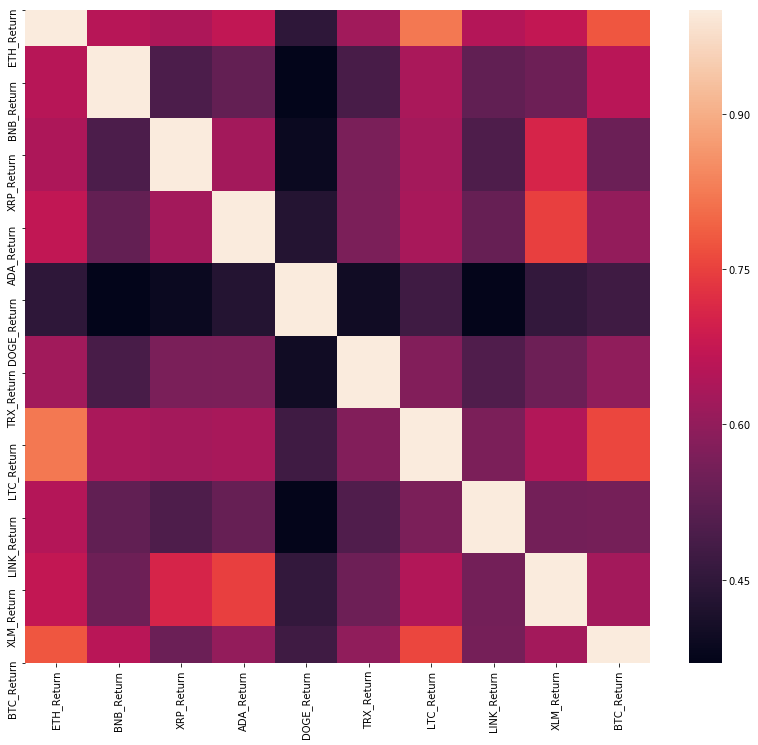

In [72]:
CryptoCorrelation=Crypto.corr()
plt.figure(figsize=(14,12))

sns.heatmap(CryptoCorrelation,
           xticklabels=CryptoCorrelation.columns.values,
           yticklabels=CryptoCorrelation.columns.values);



In [73]:
Data = Crypto.merge(Indicators, how="outer", on="Date")
Data = Data.iloc[1:]
Data.head()

,ETH_Return,BNB_Return,XRP_Return,ADA_Return,DOGE_Return,TRX_Return,LTC_Return,LINK_Return,XLM_Return,BTC_Return,S&P500,STOXX600,MSCI AC Asia,NASDAQ,Gold,NatGas,US10YT,VIX,EU10YT,WTI Crude Oil
Date,,,,,,,,,,,,,,,,,,,,
2022-05-03,-0.054928,-0.048425,-0.066554,-0.151115,-0.047414,-0.175917,-0.067450,-0.088094,-0.069918,-0.050313,-0.029425,0.010884,0.003222,-0.033490,-0.007009,-0.056341,0.011105,0.140343,-0.029,-5.31
2022-05-02,0.026215,0.016025,0.015454,0.013376,0.010889,-0.050278,0.013500,0.005144,0.009248,0.020422,-0.004825,-0.005326,0.000595,-0.001074,-0.002690,-0.062111,-0.000739,0.100425,0.007,2.65
2022-05-01,-0.010432,0.001568,-0.010515,0.011216,0.013917,0.030311,-0.012567,0.011848,0.013063,-0.001565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-30,-0.035113,-0.032590,-0.034738,-0.043554,-0.040078,-0.121926,-0.033436,-0.028239,-0.038288,-0.019801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-29,0.030806,0.039688,0.040583,0.061982,0.056911,0.012146,0.042867,0.084799,0.049195,0.023452,-0.005659,0.014672,0.004810,-0.017049,0.017892,-0.031391,-0.013290,0.032251,-0.021,-0.59


In [74]:
Data.corr()

,ETH_Return,BNB_Return,XRP_Return,ADA_Return,DOGE_Return,TRX_Return,LTC_Return,LINK_Return,XLM_Return,BTC_Return,S&P500,STOXX600,MSCI AC Asia,NASDAQ,Gold,NatGas,US10YT,VIX,EU10YT,WTI Crude Oil
ETH_Return,1.000000,0.655131,0.640433,0.668634,0.448160,0.621241,0.821770,0.648760,0.670665,0.778165,0.247565,0.224559,0.092836,0.246339,0.093068,-0.033058,0.063704,-0.187286,0.047988,0.004676
BNB_Return,0.655131,1.000000,0.496842,0.531959,0.369966,0.490433,0.634352,0.528624,0.545496,0.657045,0.205964,0.176921,0.062830,0.206344,0.064537,0.013450,0.056650,-0.150016,0.037302,0.012166
XRP_Return,0.640433,0.496842,1.000000,0.625773,0.388341,0.564702,0.626811,0.498634,0.705764,0.544086,0.174239,0.143277,0.065637,0.177259,0.044578,0.027233,0.039434,-0.140845,0.035148,0.015899
ADA_Return,0.668634,0.531959,0.625773,1.000000,0.429992,0.567267,0.631583,0.535142,0.746881,0.601660,0.202412,0.171811,0.085924,0.200512,0.079508,0.013736,0.047764,-0.147485,0.036476,0.031199
DOGE_Return,0.448160,0.369966,0.388341,0.429992,1.000000,0.398453,0.475422,0.372971,0.453767,0.473859,0.118450,0.102186,-0.009074,0.113191,0.054977,-0.035708,0.019667,-0.128463,0.021775,0.010095
TRX_Return,0.621241,0.490433,0.564702,0.567267,0.398453,1.000000,0.578474,0.501426,0.545953,0.597084,0.151156,0.140415,0.061512,0.142707,0.067820,-0.011433,0.034875,-0.107457,0.012520,0.020644
LTC_Return,0.821770,0.634352,0.626811,0.631583,0.475422,0.578474,1.000000,0.569288,0.647941,0.757430,0.204722,0.185352,0.087237,0.206831,0.084176,-0.040537,0.057791,-0.148804,0.039982,0.013551
LINK_Return,0.648760,0.528624,0.498634,0.535142,0.372971,0.501426,0.569288,1.000000,0.555550,0.557439,0.211727,0.180789,0.061713,0.210773,0.084435,0.001550,0.032895,-0.166280,0.003633,0.000623
XLM_Return,0.670665,0.545496,0.705764,0.746881,0.453767,0.545953,0.647941,0.555550,1.000000,0.624314,0.200722,0.168065,0.061978,0.195143,0.040889,0.016685,0.046065,-0.164447,0.019654,0.028234
BTC_Return,0.778165,0.657045,0.544086,0.601660,0.473859,0.597084,0.757430,0.557439,0.624314,1.000000,0.231765,0.221053,0.065675,0.234730,0.083818,-0.019394,0.066301,-0.169252,0.037062,0.015926


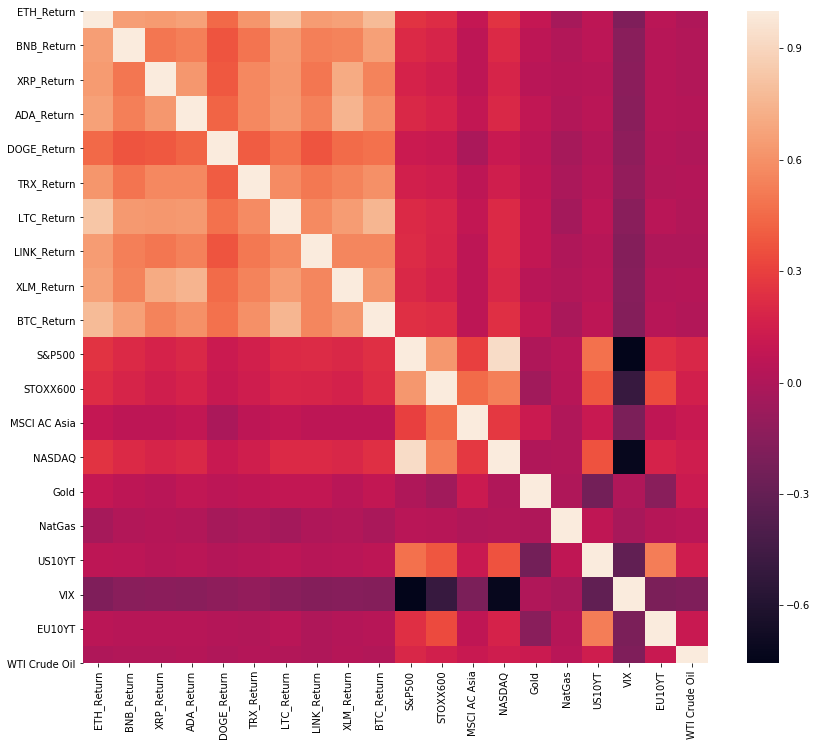

In [75]:
Datacorrelation=Data.corr()
plt.figure(figsize=(14,12))

sns.heatmap(Datacorrelation,
           xticklabels=Datacorrelation.columns.values,
           yticklabels=Datacorrelation.columns.values);




In [82]:
#Data.isnull().sum()

In [83]:
#Data = Data.dropna(how="any")

## Conclusion multicollinearity


The correlation table shows that there is correlation (0.80) between some cryptocurrencies but overall it is not a perfect multicollinearity. For the independent variables we have similar results. In practice its common that independent variables could be highly correlated. 


## --------------------------------------------------------------------------------------------------------

# Multivariate OLS-Regression

### Descriptive Statistics

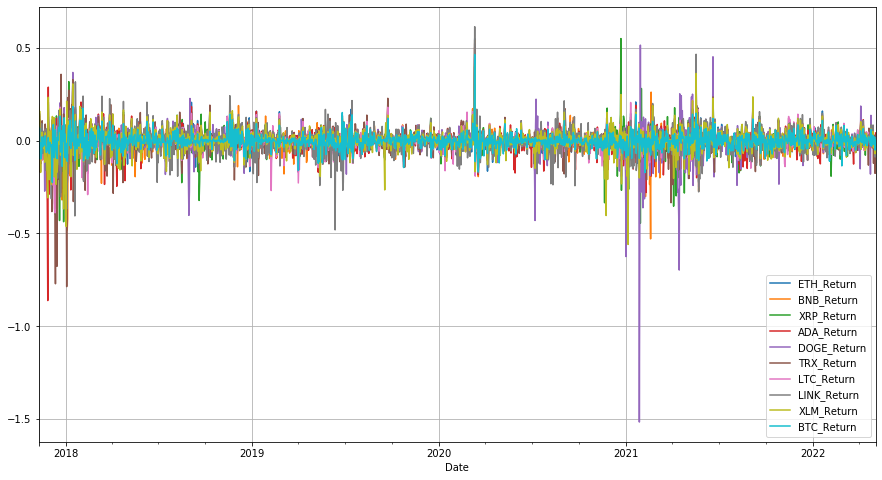

In [627]:
Crypto.plot(figsize=(15, 8), grid=True);
#plt.axvline(x='2020-3-24');
#plt.text('2020-3-24', 5, 'Covid-Crisis', fontsize=24, rotation=90)

In [76]:
Indicators.describe()

,S&P500,STOXX600,MSCI AC Asia,NASDAQ,Gold,NatGas,US10YT,VIX,EU10YT,WTI Crude Oil
count,2827.000000,2827.000000,2827.000000,2827.000000,2827.000000,2827.000000,2827.000000,2827.000000,2827.000000,2827.000000
mean,-0.000431,-0.000169,-0.000076,-0.000626,-0.000105,-0.000284,-0.000063,-0.000189,0.000488,-0.007542
std,0.010980,0.010883,0.009527,0.012899,0.009918,0.032195,0.031291,0.080554,0.041658,2.046483
min,-0.089683,-0.080704,-0.054315,-0.095966,-0.046867,-0.381727,-0.367184,-0.768245,-0.238000,-45.890000
25%,-0.005542,-0.005669,-0.005396,-0.007045,-0.005350,-0.016546,-0.014627,-0.037093,-0.022000,-0.800000
50%,-0.000702,-0.000697,-0.000392,-0.001179,-0.000378,0.000000,0.000109,0.006417,0.002000,-0.070000
75%,0.003553,0.004597,0.004701,0.004424,0.004861,0.016956,0.015153,0.045805,0.024000,0.745000
max,0.127652,0.121915,0.057532,0.130032,0.088787,0.300480,0.323981,0.436760,0.294000,55.290000


## Creating a new Dataset for the Loop

In [77]:
Data1=Data.dropna(how="any")
Data1

,ETH_Return,BNB_Return,XRP_Return,ADA_Return,DOGE_Return,TRX_Return,LTC_Return,LINK_Return,XLM_Return,BTC_Return,S&P500,STOXX600,MSCI AC Asia,NASDAQ,Gold,NatGas,US10YT,VIX,EU10YT,WTI Crude Oil
Date,,,,,,,,,,,,,,,,,,,,
2022-05-03,-0.054928,-0.048425,-0.066554,-0.151115,-0.047414,-0.175917,-0.067450,-0.088094,-0.069918,-0.050313,-0.029425,0.010884,0.003222,-0.033490,-0.007009,-0.056341,0.011105,0.140343,-0.029,-5.31
2022-05-02,0.026215,0.016025,0.015454,0.013376,0.010889,-0.050278,0.013500,0.005144,0.009248,0.020422,-0.004825,-0.005326,0.000595,-0.001074,-0.002690,-0.062111,-0.000739,0.100425,0.007,2.65
2022-04-29,0.030806,0.039688,0.040583,0.061982,0.056911,0.012146,0.042867,0.084799,0.049195,0.023452,-0.005659,0.014672,0.004810,-0.017049,0.017892,-0.031391,-0.013290,0.032251,-0.021,-0.59
2022-04-28,0.042193,0.034153,0.052499,0.047198,0.017152,0.003425,0.028920,0.056244,0.042761,0.029702,0.036959,-0.007399,-0.018958,0.045712,-0.001083,-0.050393,-0.036540,-0.107692,-0.039,0.88
2022-04-27,-0.016482,-0.038273,0.012270,-0.003983,0.016870,-0.008364,-0.027320,0.005536,-0.007150,-0.013484,-0.024446,-0.006193,-0.006603,-0.034222,-0.004352,0.053563,-0.002156,0.052293,-0.090,-3.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-11-15,0.007325,-0.030546,-0.064336,-0.042024,-0.037381,0.049889,-0.107404,0.092097,-0.004873,-0.073272,-0.008163,-0.007746,-0.009608,-0.012825,0.000008,0.008805,-0.021103,0.110196,0.004,0.14
2017-11-14,0.012740,0.039794,-0.014812,-0.008163,-0.123025,0.067844,-0.018087,0.010560,-0.018495,-0.097529,0.005541,0.004962,0.010493,0.005622,0.001735,0.007117,0.021103,-0.124757,0.018,0.39
2017-11-13,-0.063948,0.057371,-0.030893,-0.016219,0.022548,-0.162637,-0.020683,-0.027174,-0.171026,-0.011559,0.002312,0.005896,0.003356,0.003574,-0.002361,0.020738,0.013382,-0.007796,0.021,1.10


In [376]:
Crypto11 = Data1.iloc[:,:10]
Crypto11 =Crypto11.dropna(how="any")
Crypto11.replace([np.inf, -np.inf], np.nan, inplace=True)
Crypto11

,ETH_Return,BNB_Return,XRP_Return,ADA_Return,DOGE_Return,TRX_Return,LTC_Return,LINK_Return,XLM_Return,BTC_Return
Date,,,,,,,,,,
2022-05-03,-0.054928,-0.048425,-0.066554,-0.151115,-0.047414,-0.175917,-0.067450,-0.088094,-0.069918,-0.050313
2022-05-02,0.026215,0.016025,0.015454,0.013376,0.010889,-0.050278,0.013500,0.005144,0.009248,0.020422
2022-04-29,0.030806,0.039688,0.040583,0.061982,0.056911,0.012146,0.042867,0.084799,0.049195,0.023452
2022-04-28,0.042193,0.034153,0.052499,0.047198,0.017152,0.003425,0.028920,0.056244,0.042761,0.029702
2022-04-27,-0.016482,-0.038273,0.012270,-0.003983,0.016870,-0.008364,-0.027320,0.005536,-0.007150,-0.013484
...,...,...,...,...,...,...,...,...,...,...
2017-11-15,0.007325,-0.030546,-0.064336,-0.042024,-0.037381,0.049889,-0.107404,0.092097,-0.004873,-0.073272
2017-11-14,0.012740,0.039794,-0.014812,-0.008163,-0.123025,0.067844,-0.018087,0.010560,-0.018495,-0.097529
2017-11-13,-0.063948,0.057371,-0.030893,-0.016219,0.022548,-0.162637,-0.020683,-0.027174,-0.171026,-0.011559


In [377]:
Indicators12 = Data1.iloc[:,[10,11,12,13,14,15,16,17,18,19]]
Indicators12 =Indicators12.dropna(how="any")
Indicators12.replace([np.inf, -np.inf], np.nan, inplace=True)
Indicators12

,S&P500,STOXX600,MSCI AC Asia,NASDAQ,Gold,NatGas,US10YT,VIX,EU10YT,WTI Crude Oil
Date,,,,,,,,,,
2022-05-03,-0.029425,0.010884,0.003222,-0.033490,-0.007009,-0.056341,0.011105,0.140343,-0.029,-5.31
2022-05-02,-0.004825,-0.005326,0.000595,-0.001074,-0.002690,-0.062111,-0.000739,0.100425,0.007,2.65
2022-04-29,-0.005659,0.014672,0.004810,-0.017049,0.017892,-0.031391,-0.013290,0.032251,-0.021,-0.59
2022-04-28,0.036959,-0.007399,-0.018958,0.045712,-0.001083,-0.050393,-0.036540,-0.107692,-0.039,0.88
2022-04-27,-0.024446,-0.006193,-0.006603,-0.034222,-0.004352,0.053563,-0.002156,0.052293,-0.090,-3.51
...,...,...,...,...,...,...,...,...,...,...
2017-11-15,-0.008163,-0.007746,-0.009608,-0.012825,0.000008,0.008805,-0.021103,0.110196,0.004,0.14
2017-11-14,0.005541,0.004962,0.010493,0.005622,0.001735,0.007117,0.021103,-0.124757,0.018,0.39
2017-11-13,0.002312,0.005896,0.003356,0.003574,-0.002361,0.020738,0.013382,-0.007796,0.021,1.10


### Loop for OLS 

In [256]:
array1 = ['NatGas','EU10YT', 'WTI Crude Oil', 'S&P500', 'VIX', 'US10YT', 'Gold', 'MSCI AC Asia', 'NASDAQ', 'STOXX600']
array2 = ['NatGas','EU10YT', 'WTI Crude Oil', 'S&P500', 'VIX', 'US10YT', 'Gold', 'MSCI AC Asia', 'NASDAQ']
array3 = ['NatGas','EU10YT', 'WTI Crude Oil', 'S&P500', 'VIX', 'US10YT', 'Gold', 'MSCI AC Asia']
array4 = ['NatGas','EU10YT', 'WTI Crude Oil', 'S&P500', 'VIX', 'US10YT', 'Gold']
array5 = ['NatGas','EU10YT', 'WTI Crude Oil', 'S&P500', 'VIX', 'US10YT']        
array6 = ['NatGas','EU10YT', 'WTI Crude Oil', 'S&P500', 'VIX']          
array7 = ['NatGas','EU10YT', 'WTI Crude Oil', 'S&P500']          
array8 = ['NatGas','EU10YT', 'WTI Crude Oil']
array9 = ['NatGas','EU10YT']
array10= ['NatGas']
array11 = ['NatGas','EU10YT', 'WTI Crude Oil', 'S&P500', 'US10YT', 'Gold', 'MSCI AC Asia', 'NASDAQ', 'STOXX600']
array12 = ['NatGas','EU10YT', 'WTI Crude Oil','US10YT', 'Gold', 'MSCI AC Asia', 'NASDAQ', 'STOXX600']
array13 = ['NatGas','EU10YT', 'WTI Crude Oil', 'VIX', 'US10YT', 'Gold', 'MSCI AC Asia', 'STOXX600']
array14 = ['NatGas','EU10YT', 'WTI Crude Oil','US10YT', 'Gold', 'MSCI AC Asia', 'STOXX600']
array15 = ['NatGas','EU10YT', 'WTI Crude Oil', 'S&P500', 'US10YT', 'Gold', 'MSCI AC Asia', 'NASDAQ', 'STOXX600']
array16 = ['NatGas','EU10YT', 'WTI Crude Oil', 'S&P500', 'VIX', 'Gold', 'MSCI AC Asia', 'NASDAQ', 'STOXX600']
array17 = ['NatGas','EU10YT', 'WTI Crude Oil', 'US10YT', 'Gold', 'MSCI AC Asia', 'STOXX600']
array18 = ['NatGas','EU10YT', 'WTI Crude Oil', 'Gold', 'MSCI AC Asia', 'STOXX600']
array19 = ['NatGas','EU10YT', 'WTI Crude Oil','S&P500', 'US10YT', 'Gold', 'MSCI AC Asia', 'STOXX600']
array20 = ['NatGas','EU10YT', 'WTI Crude Oil', 'S&P500', 'US10YT', 'Gold', 'MSCI AC Asia', 'NASDAQ', 'STOXX600']





In [491]:
Data1 = pd.DataFrame(columns=[
    'Indicators','R-Squared'])

for u in Crypto11:
    for i in [array1,array2,array3,array4,array5,array6,array7,array8,array9,array10,array11,array12,array13,array14, array15,array16,array17,array18,array19,array20]:
        Y = Crypto11[u]
        X = Indicators12[i]
        model = sm.OLS(y,x, missing = 'drop') 
        X = sm.add_constant(X)
        est = sm.OLS(Y,X)
        est2 = est.fit()
        results = model.fit()
        results.summary()
        display(u + ' / ' + str(i) + '\n'+ 'R-squared: ',est2.rsquared, '\n')

"ETH_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'VIX', 'US10YT', 'Gold', 'MSCI AC Asia', 'NASDAQ', 'STOXX600']\nR-squared: "

0.09129173447501193

'\n'

"ETH_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'VIX', 'US10YT', 'Gold', 'MSCI AC Asia', 'NASDAQ']\nR-squared: "

0.07750991341230373

'\n'

"ETH_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'VIX', 'US10YT', 'Gold', 'MSCI AC Asia']\nR-squared: "

0.07669259295091346

'\n'

"ETH_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'VIX', 'US10YT', 'Gold']\nR-squared: "

0.07659643835136687

'\n'

"ETH_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'VIX', 'US10YT']\nR-squared: "

0.07110000128641802

'\n'

"ETH_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'VIX']\nR-squared: "

0.06499514718967914

'\n'

"ETH_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500']\nR-squared: "

0.06476432244270425

'\n'

"ETH_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil']\nR-squared: "

0.003520873230340671

'\n'

"ETH_Return / ['NatGas', 'EU10YT']\nR-squared: "

0.003509361658580401

'\n'

"ETH_Return / ['NatGas']\nR-squared: "

0.0010928336398305927

'\n'

"ETH_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'US10YT', 'Gold', 'MSCI AC Asia', 'NASDAQ', 'STOXX600']\nR-squared: "

0.0912408712096564

'\n'

"ETH_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'US10YT', 'Gold', 'MSCI AC Asia', 'NASDAQ', 'STOXX600']\nR-squared: "

0.09114897887815565

'\n'

"ETH_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'VIX', 'US10YT', 'Gold', 'MSCI AC Asia', 'STOXX600']\nR-squared: "

0.07402076372496846

'\n'

"ETH_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'US10YT', 'Gold', 'MSCI AC Asia', 'STOXX600']\nR-squared: "

0.06452365642216817

'\n'

"ETH_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'US10YT', 'Gold', 'MSCI AC Asia', 'NASDAQ', 'STOXX600']\nR-squared: "

0.0912408712096564

'\n'

"ETH_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'VIX', 'Gold', 'MSCI AC Asia', 'NASDAQ', 'STOXX600']\nR-squared: "

0.08942156738071494

'\n'

"ETH_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'US10YT', 'Gold', 'MSCI AC Asia', 'STOXX600']\nR-squared: "

0.06452365642216817

'\n'

"ETH_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'Gold', 'MSCI AC Asia', 'STOXX600']\nR-squared: "

0.06450528864681893

'\n'

"ETH_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'US10YT', 'Gold', 'MSCI AC Asia', 'STOXX600']\nR-squared: "

0.08770192086851991

'\n'

"ETH_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'US10YT', 'Gold', 'MSCI AC Asia', 'NASDAQ', 'STOXX600']\nR-squared: "

0.0912408712096564

'\n'

"BNB_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'VIX', 'US10YT', 'Gold', 'MSCI AC Asia', 'NASDAQ', 'STOXX600']\nR-squared: "

0.05863856473764795

'\n'

"BNB_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'VIX', 'US10YT', 'Gold', 'MSCI AC Asia', 'NASDAQ']\nR-squared: "

0.050314920387718676

'\n'

"BNB_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'VIX', 'US10YT', 'Gold', 'MSCI AC Asia']\nR-squared: "

0.049376640577003084

'\n'

"BNB_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'VIX', 'US10YT', 'Gold']\nR-squared: "

0.04885203337887267

'\n'

"BNB_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'VIX', 'US10YT']\nR-squared: "

0.04657946471461316

'\n'

"BNB_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'VIX']\nR-squared: "

0.04268560846486413

'\n'

"BNB_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500']\nR-squared: "

0.04267371682688781

'\n'

"BNB_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil']\nR-squared: "

0.001679446951122876

'\n'

"BNB_Return / ['NatGas', 'EU10YT']\nR-squared: "

0.0015395141832041936

'\n'

"BNB_Return / ['NatGas']\nR-squared: "

0.00018090464655873273

'\n'

"BNB_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'US10YT', 'Gold', 'MSCI AC Asia', 'NASDAQ', 'STOXX600']\nR-squared: "

0.058359713548816194

'\n'

"BNB_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'US10YT', 'Gold', 'MSCI AC Asia', 'NASDAQ', 'STOXX600']\nR-squared: "

0.058303691548509784

'\n'

"BNB_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'VIX', 'US10YT', 'Gold', 'MSCI AC Asia', 'STOXX600']\nR-squared: "

0.043949861435223614

'\n'

"BNB_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'US10YT', 'Gold', 'MSCI AC Asia', 'STOXX600']\nR-squared: "

0.03804892611412847

'\n'

"BNB_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'US10YT', 'Gold', 'MSCI AC Asia', 'NASDAQ', 'STOXX600']\nR-squared: "

0.058359713548816194

'\n'

"BNB_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'VIX', 'Gold', 'MSCI AC Asia', 'NASDAQ', 'STOXX600']\nR-squared: "

0.057356197810546794

'\n'

"BNB_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'US10YT', 'Gold', 'MSCI AC Asia', 'STOXX600']\nR-squared: "

0.03804892611412847

'\n'

"BNB_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'Gold', 'MSCI AC Asia', 'STOXX600']\nR-squared: "

0.03799977248666708

'\n'

"BNB_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'US10YT', 'Gold', 'MSCI AC Asia', 'STOXX600']\nR-squared: "

0.05558428271699445

'\n'

"BNB_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'US10YT', 'Gold', 'MSCI AC Asia', 'NASDAQ', 'STOXX600']\nR-squared: "

0.058359713548816194

'\n'

"XRP_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'VIX', 'US10YT', 'Gold', 'MSCI AC Asia', 'NASDAQ', 'STOXX600']\nR-squared: "

0.04061705245712888

'\n'

"XRP_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'VIX', 'US10YT', 'Gold', 'MSCI AC Asia', 'NASDAQ']\nR-squared: "

0.03713107101734958

'\n'

"XRP_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'VIX', 'US10YT', 'Gold', 'MSCI AC Asia']\nR-squared: "

0.03624465550139222

'\n'

"XRP_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'VIX', 'US10YT', 'Gold']\nR-squared: "

0.03623256563165611

'\n'

"XRP_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'VIX', 'US10YT']\nR-squared: "

0.035452434296857405

'\n'

"XRP_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'VIX']\nR-squared: "

0.03128603461005608

'\n'

"XRP_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500']\nR-squared: "

0.030786658966860503

'\n'

"XRP_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil']\nR-squared: "

0.0021637221546707552

'\n'

"XRP_Return / ['NatGas', 'EU10YT']\nR-squared: "

0.0019132244228424744

'\n'

"XRP_Return / ['NatGas']\nR-squared: "

0.0007416289313115776

'\n'

"XRP_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'US10YT', 'Gold', 'MSCI AC Asia', 'NASDAQ', 'STOXX600']\nR-squared: "

0.04059843263631768

'\n'

"XRP_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'US10YT', 'Gold', 'MSCI AC Asia', 'NASDAQ', 'STOXX600']\nR-squared: "

0.04051067211495574

'\n'

"XRP_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'VIX', 'US10YT', 'Gold', 'MSCI AC Asia', 'STOXX600']\nR-squared: "

0.030825579803367753

'\n'

"XRP_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'US10YT', 'Gold', 'MSCI AC Asia', 'STOXX600']\nR-squared: "

0.023424742141419652

'\n'

"XRP_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'US10YT', 'Gold', 'MSCI AC Asia', 'NASDAQ', 'STOXX600']\nR-squared: "

0.04059843263631768

'\n'

"XRP_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'VIX', 'Gold', 'MSCI AC Asia', 'NASDAQ', 'STOXX600']\nR-squared: "

0.03864075637657449

'\n'

"XRP_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'US10YT', 'Gold', 'MSCI AC Asia', 'STOXX600']\nR-squared: "

0.023424742141419652

'\n'

"XRP_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'Gold', 'MSCI AC Asia', 'STOXX600']\nR-squared: "

0.023353221920569767

'\n'

"XRP_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'US10YT', 'Gold', 'MSCI AC Asia', 'STOXX600']\nR-squared: "

0.03847131192622677

'\n'

"XRP_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'US10YT', 'Gold', 'MSCI AC Asia', 'NASDAQ', 'STOXX600']\nR-squared: "

0.04059843263631768

'\n'

"ADA_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'VIX', 'US10YT', 'Gold', 'MSCI AC Asia', 'NASDAQ', 'STOXX600']\nR-squared: "

0.05624592027075104

'\n'

"ADA_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'VIX', 'US10YT', 'Gold', 'MSCI AC Asia', 'NASDAQ']\nR-squared: "

0.05080635683473378

'\n'

"ADA_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'VIX', 'US10YT', 'Gold', 'MSCI AC Asia']\nR-squared: "

0.050169051060852676

'\n'

"ADA_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'VIX', 'US10YT', 'Gold']\nR-squared: "

0.05016868594503743

'\n'

"ADA_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'VIX', 'US10YT']\nR-squared: "

0.04656449809169183

'\n'

"ADA_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'VIX']\nR-squared: "

0.04125125303472976

'\n'

"ADA_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500']\nR-squared: "

0.04124913344531744

'\n'

"ADA_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil']\nR-squared: "

0.0024402203105028386

'\n'

"ADA_Return / ['NatGas', 'EU10YT']\nR-squared: "

0.0014863870709312943

'\n'

"ADA_Return / ['NatGas']\nR-squared: "

0.00018867898562580088

'\n'

"ADA_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'US10YT', 'Gold', 'MSCI AC Asia', 'NASDAQ', 'STOXX600']\nR-squared: "

0.05600169743823591

'\n'

"ADA_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'US10YT', 'Gold', 'MSCI AC Asia', 'NASDAQ', 'STOXX600']\nR-squared: "

0.05573976983895235

'\n'

"ADA_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'VIX', 'US10YT', 'Gold', 'MSCI AC Asia', 'STOXX600']\nR-squared: "

0.04262435509434326

'\n'

"ADA_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'US10YT', 'Gold', 'MSCI AC Asia', 'STOXX600']\nR-squared: "

0.0368584875271768

'\n'

"ADA_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'US10YT', 'Gold', 'MSCI AC Asia', 'NASDAQ', 'STOXX600']\nR-squared: "

0.05600169743823591

'\n'

"ADA_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'VIX', 'Gold', 'MSCI AC Asia', 'NASDAQ', 'STOXX600']\nR-squared: "

0.05423632599234196

'\n'

"ADA_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'US10YT', 'Gold', 'MSCI AC Asia', 'STOXX600']\nR-squared: "

0.0368584875271768

'\n'

"ADA_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'Gold', 'MSCI AC Asia', 'STOXX600']\nR-squared: "

0.03685745709182742

'\n'

"ADA_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'US10YT', 'Gold', 'MSCI AC Asia', 'STOXX600']\nR-squared: "

0.054176095565233395

'\n'

"ADA_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'US10YT', 'Gold', 'MSCI AC Asia', 'NASDAQ', 'STOXX600']\nR-squared: "

0.05600169743823591

'\n'

"DOGE_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'VIX', 'US10YT', 'Gold', 'MSCI AC Asia', 'NASDAQ', 'STOXX600']\nR-squared: "

0.03256708391154817

'\n'

"DOGE_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'VIX', 'US10YT', 'Gold', 'MSCI AC Asia', 'NASDAQ']\nR-squared: "

0.027778480462181232

'\n'

"DOGE_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'VIX', 'US10YT', 'Gold', 'MSCI AC Asia']\nR-squared: "

0.027583367700339978

'\n'

"DOGE_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'VIX', 'US10YT', 'Gold']\nR-squared: "

0.02387955144564302

'\n'

"DOGE_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'VIX', 'US10YT']\nR-squared: "

0.02175902764762372

'\n'

"DOGE_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'VIX']\nR-squared: "

0.020012170802273577

'\n'

"DOGE_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500']\nR-squared: "

0.016083088033870374

'\n'

"DOGE_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil']\nR-squared: "

0.001889093347367532

'\n'

"DOGE_Return / ['NatGas', 'EU10YT']\nR-squared: "

0.0018050582440818363

'\n'

"DOGE_Return / ['NatGas']\nR-squared: "

0.0012750560596713756

'\n'

"DOGE_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'US10YT', 'Gold', 'MSCI AC Asia', 'NASDAQ', 'STOXX600']\nR-squared: "

0.030146973210956163

'\n'

"DOGE_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'US10YT', 'Gold', 'MSCI AC Asia', 'NASDAQ', 'STOXX600']\nR-squared: "

0.029643911413934965

'\n'

"DOGE_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'VIX', 'US10YT', 'Gold', 'MSCI AC Asia', 'STOXX600']\nR-squared: "

0.03148440221938975

'\n'

"DOGE_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'US10YT', 'Gold', 'MSCI AC Asia', 'STOXX600']\nR-squared: "

0.023119206656582514

'\n'

"DOGE_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'US10YT', 'Gold', 'MSCI AC Asia', 'NASDAQ', 'STOXX600']\nR-squared: "

0.030146973210956163

'\n'

"DOGE_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'VIX', 'Gold', 'MSCI AC Asia', 'NASDAQ', 'STOXX600']\nR-squared: "

0.03178475228593347

'\n'

"DOGE_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'US10YT', 'Gold', 'MSCI AC Asia', 'STOXX600']\nR-squared: "

0.023119206656582514

'\n'

"DOGE_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'Gold', 'MSCI AC Asia', 'STOXX600']\nR-squared: "

0.023095108839871648

'\n'

"DOGE_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'US10YT', 'Gold', 'MSCI AC Asia', 'STOXX600']\nR-squared: "

0.029967844294789825

'\n'

"DOGE_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'US10YT', 'Gold', 'MSCI AC Asia', 'NASDAQ', 'STOXX600']\nR-squared: "

0.030146973210956163

'\n'

"TRX_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'VIX', 'US10YT', 'Gold', 'MSCI AC Asia', 'NASDAQ', 'STOXX600']\nR-squared: "

0.033668129323317975

'\n'

"TRX_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'VIX', 'US10YT', 'Gold', 'MSCI AC Asia', 'NASDAQ']\nR-squared: "

0.028221626586603876

'\n'

"TRX_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'VIX', 'US10YT', 'Gold', 'MSCI AC Asia']\nR-squared: "

0.028218725080154994

'\n'

"TRX_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'VIX', 'US10YT', 'Gold']\nR-squared: "

0.028211177909712948

'\n'

"TRX_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'VIX', 'US10YT']\nR-squared: "

0.02546455835465733

'\n'

"TRX_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'VIX']\nR-squared: "

0.02339536385542773

'\n'

"TRX_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500']\nR-squared: "

0.02339140154779995

'\n'

"TRX_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil']\nR-squared: "

0.0007084296443692351

'\n'

"TRX_Return / ['NatGas', 'EU10YT']\nR-squared: "

0.0002976997917912838

'\n'

"TRX_Return / ['NatGas']\nR-squared: "

0.0001307121897191621

'\n'

"TRX_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'US10YT', 'Gold', 'MSCI AC Asia', 'NASDAQ', 'STOXX600']\nR-squared: "

0.03352659389309698

'\n'

"TRX_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'US10YT', 'Gold', 'MSCI AC Asia', 'NASDAQ', 'STOXX600']\nR-squared: "

0.03311716578292634

'\n'

"TRX_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'VIX', 'US10YT', 'Gold', 'MSCI AC Asia', 'STOXX600']\nR-squared: "

0.028095841288489742

'\n'

"TRX_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'US10YT', 'Gold', 'MSCI AC Asia', 'STOXX600']\nR-squared: "

0.02590673624564299

'\n'

"TRX_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'US10YT', 'Gold', 'MSCI AC Asia', 'NASDAQ', 'STOXX600']\nR-squared: "

0.03352659389309698

'\n'

"TRX_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'VIX', 'Gold', 'MSCI AC Asia', 'NASDAQ', 'STOXX600']\nR-squared: "

0.03295754062333878

'\n'

"TRX_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'US10YT', 'Gold', 'MSCI AC Asia', 'STOXX600']\nR-squared: "

0.02590673624564299

'\n'

"TRX_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'Gold', 'MSCI AC Asia', 'STOXX600']\nR-squared: "

0.0258767184541977

'\n'

"TRX_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'US10YT', 'Gold', 'MSCI AC Asia', 'STOXX600']\nR-squared: "

0.03323392883272891

'\n'

"TRX_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'US10YT', 'Gold', 'MSCI AC Asia', 'NASDAQ', 'STOXX600']\nR-squared: "

0.03352659389309698

'\n'

"LTC_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'VIX', 'US10YT', 'Gold', 'MSCI AC Asia', 'NASDAQ', 'STOXX600']\nR-squared: "

0.0643393443438598

'\n'

"LTC_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'VIX', 'US10YT', 'Gold', 'MSCI AC Asia', 'NASDAQ']\nR-squared: "

0.055040941841294266

'\n'

"LTC_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'VIX', 'US10YT', 'Gold', 'MSCI AC Asia']\nR-squared: "

0.053697562687485156

'\n'

"LTC_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'VIX', 'US10YT', 'Gold']\nR-squared: "

0.053695743978563026

'\n'

"LTC_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'VIX', 'US10YT']\nR-squared: "

0.048841388237642724

'\n'

"LTC_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'VIX']\nR-squared: "

0.045357030756755456

'\n'

"LTC_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500']\nR-squared: "

0.045349381652371124

'\n'

"LTC_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil']\nR-squared: "

0.0035081618702522688

'\n'

"LTC_Return / ['NatGas', 'EU10YT']\nR-squared: "

0.003357694941645839

'\n'

"LTC_Return / ['NatGas']\nR-squared: "

0.0016432225780311782

'\n'

"LTC_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'US10YT', 'Gold', 'MSCI AC Asia', 'NASDAQ', 'STOXX600']\nR-squared: "

0.06411107374292824

'\n'

"LTC_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'US10YT', 'Gold', 'MSCI AC Asia', 'NASDAQ', 'STOXX600']\nR-squared: "

0.06409479473478585

'\n'

"LTC_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'VIX', 'US10YT', 'Gold', 'MSCI AC Asia', 'STOXX600']\nR-squared: "

0.05094736940604616

'\n'

"LTC_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'US10YT', 'Gold', 'MSCI AC Asia', 'STOXX600']\nR-squared: "

0.04577399166403562

'\n'

"LTC_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'US10YT', 'Gold', 'MSCI AC Asia', 'NASDAQ', 'STOXX600']\nR-squared: "

0.06411107374292824

'\n'

"LTC_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'VIX', 'Gold', 'MSCI AC Asia', 'NASDAQ', 'STOXX600']\nR-squared: "

0.06368204076891515

'\n'

"LTC_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'US10YT', 'Gold', 'MSCI AC Asia', 'STOXX600']\nR-squared: "

0.04577399166403562

'\n'

"LTC_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'Gold', 'MSCI AC Asia', 'STOXX600']\nR-squared: "

0.04564881270429699

'\n'

"LTC_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'US10YT', 'Gold', 'MSCI AC Asia', 'STOXX600']\nR-squared: "

0.060482633054195656

'\n'

"LTC_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'US10YT', 'Gold', 'MSCI AC Asia', 'NASDAQ', 'STOXX600']\nR-squared: "

0.06411107374292824

'\n'

"LINK_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'VIX', 'US10YT', 'Gold', 'MSCI AC Asia', 'NASDAQ', 'STOXX600']\nR-squared: "

0.06550006261369856

'\n'

"LINK_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'VIX', 'US10YT', 'Gold', 'MSCI AC Asia', 'NASDAQ']\nR-squared: "

0.05603852252225783

'\n'

"LINK_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'VIX', 'US10YT', 'Gold', 'MSCI AC Asia']\nR-squared: "

0.05580699630409547

'\n'

"LINK_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'VIX', 'US10YT', 'Gold']\nR-squared: "

0.05515336909410462

'\n'

"LINK_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'VIX', 'US10YT']\nR-squared: "

0.051708296554616395

'\n'

"LINK_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'VIX']\nR-squared: "

0.04645595496676702

'\n'

"LINK_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500']\nR-squared: "

0.04590636995395647

'\n'

"LINK_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil']\nR-squared: "

1.558592699224537e-05

'\n'

"LINK_Return / ['NatGas', 'EU10YT']\nR-squared: "

1.523253587620843e-05

'\n'

"LINK_Return / ['NatGas']\nR-squared: "

2.401154245545989e-06

'\n'

"LINK_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'US10YT', 'Gold', 'MSCI AC Asia', 'NASDAQ', 'STOXX600']\nR-squared: "

0.0654894596634813

'\n'

"LINK_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'US10YT', 'Gold', 'MSCI AC Asia', 'NASDAQ', 'STOXX600']\nR-squared: "

0.06508436548559471

'\n'

"LINK_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'VIX', 'US10YT', 'Gold', 'MSCI AC Asia', 'STOXX600']\nR-squared: "

0.05316561483968063

'\n'

"LINK_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'US10YT', 'Gold', 'MSCI AC Asia', 'STOXX600']\nR-squared: "

0.043950626756793953

'\n'

"LINK_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'US10YT', 'Gold', 'MSCI AC Asia', 'NASDAQ', 'STOXX600']\nR-squared: "

0.0654894596634813

'\n'

"LINK_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'VIX', 'Gold', 'MSCI AC Asia', 'NASDAQ', 'STOXX600']\nR-squared: "

0.06340768217358361

'\n'

"LINK_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'US10YT', 'Gold', 'MSCI AC Asia', 'STOXX600']\nR-squared: "

0.043950626756793953

'\n'

"LINK_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'Gold', 'MSCI AC Asia', 'STOXX600']\nR-squared: "

0.043950270803188474

'\n'

"LINK_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'US10YT', 'Gold', 'MSCI AC Asia', 'STOXX600']\nR-squared: "

0.06368539779852134

'\n'

"LINK_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'US10YT', 'Gold', 'MSCI AC Asia', 'NASDAQ', 'STOXX600']\nR-squared: "

0.0654894596634813

'\n'

"XLM_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'VIX', 'US10YT', 'Gold', 'MSCI AC Asia', 'NASDAQ', 'STOXX600']\nR-squared: "

0.051462186545306765

'\n'

"XLM_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'VIX', 'US10YT', 'Gold', 'MSCI AC Asia', 'NASDAQ']\nR-squared: "

0.04542485063628088

'\n'

"XLM_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'VIX', 'US10YT', 'Gold', 'MSCI AC Asia']\nR-squared: "

0.04536551316258863

'\n'

"XLM_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'VIX', 'US10YT', 'Gold']\nR-squared: "

0.045112897160242915

'\n'

"XLM_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'VIX', 'US10YT']\nR-squared: "

0.04474000950577672

'\n'

"XLM_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'VIX']\nR-squared: "

0.041194145516444514

'\n'

"XLM_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500']\nR-squared: "

0.04037601745268815

'\n'

"XLM_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil']\nR-squared: "

0.0014392821287079194

'\n'

"XLM_Return / ['NatGas', 'EU10YT']\nR-squared: "

0.0006427607305358185

'\n'

"XLM_Return / ['NatGas']\nR-squared: "

0.00027837298384980613

'\n'

"XLM_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'US10YT', 'Gold', 'MSCI AC Asia', 'NASDAQ', 'STOXX600']\nR-squared: "

0.05133812746660016

'\n'

"XLM_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'US10YT', 'Gold', 'MSCI AC Asia', 'NASDAQ', 'STOXX600']\nR-squared: "

0.05054486110031653

'\n'

"XLM_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'VIX', 'US10YT', 'Gold', 'MSCI AC Asia', 'STOXX600']\nR-squared: "

0.04166596905993469

'\n'

"XLM_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'US10YT', 'Gold', 'MSCI AC Asia', 'STOXX600']\nR-squared: "

0.03226222209275076

'\n'

"XLM_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'US10YT', 'Gold', 'MSCI AC Asia', 'NASDAQ', 'STOXX600']\nR-squared: "

0.05133812746660016

'\n'

"XLM_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'VIX', 'Gold', 'MSCI AC Asia', 'NASDAQ', 'STOXX600']\nR-squared: "

0.049382854483584815

'\n'

"XLM_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'US10YT', 'Gold', 'MSCI AC Asia', 'STOXX600']\nR-squared: "

0.03226222209275076

'\n'

"XLM_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'Gold', 'MSCI AC Asia', 'STOXX600']\nR-squared: "

0.03226130362838597

'\n'

"XLM_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'US10YT', 'Gold', 'MSCI AC Asia', 'STOXX600']\nR-squared: "

0.05038176636129921

'\n'

"XLM_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'US10YT', 'Gold', 'MSCI AC Asia', 'NASDAQ', 'STOXX600']\nR-squared: "

0.05133812746660016

'\n'

"BTC_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'VIX', 'US10YT', 'Gold', 'MSCI AC Asia', 'NASDAQ', 'STOXX600']\nR-squared: "

0.0868772742075985

'\n'

"BTC_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'VIX', 'US10YT', 'Gold', 'MSCI AC Asia', 'NASDAQ']\nR-squared: "

0.06616733948108844

'\n'

"BTC_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'VIX', 'US10YT', 'Gold', 'MSCI AC Asia']\nR-squared: "

0.06446617471746607

'\n'

"BTC_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'VIX', 'US10YT', 'Gold']\nR-squared: "

0.06341764165102415

'\n'

"BTC_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'VIX', 'US10YT']\nR-squared: "

0.05904017368364445

'\n'

"BTC_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'VIX']\nR-squared: "

0.05522362785449719

'\n'

"BTC_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500']\nR-squared: "

0.055203569692754084

'\n'

"BTC_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil']\nR-squared: "

0.0020277496431834185

'\n'

"BTC_Return / ['NatGas', 'EU10YT']\nR-squared: "

0.0018014994030560727

'\n'

"BTC_Return / ['NatGas']\nR-squared: "

0.0003761411212185317

'\n'

"BTC_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'US10YT', 'Gold', 'MSCI AC Asia', 'NASDAQ', 'STOXX600']\nR-squared: "

0.08643283970531568

'\n'

"BTC_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'US10YT', 'Gold', 'MSCI AC Asia', 'NASDAQ', 'STOXX600']\nR-squared: "

0.08618413084203325

'\n'

"BTC_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'VIX', 'US10YT', 'Gold', 'MSCI AC Asia', 'STOXX600']\nR-squared: "

0.06924453400466835

'\n'

"BTC_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'US10YT', 'Gold', 'MSCI AC Asia', 'STOXX600']\nR-squared: "

0.06367082656893253

'\n'

"BTC_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'US10YT', 'Gold', 'MSCI AC Asia', 'NASDAQ', 'STOXX600']\nR-squared: "

0.08643283970531568

'\n'

"BTC_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'VIX', 'Gold', 'MSCI AC Asia', 'NASDAQ', 'STOXX600']\nR-squared: "

0.08622548461654345

'\n'

"BTC_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'US10YT', 'Gold', 'MSCI AC Asia', 'STOXX600']\nR-squared: "

0.06367082656893253

'\n'

"BTC_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'Gold', 'MSCI AC Asia', 'STOXX600']\nR-squared: "

0.06354420991034537

'\n'

"BTC_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'US10YT', 'Gold', 'MSCI AC Asia', 'STOXX600']\nR-squared: "

0.08049801632578191

'\n'

"BTC_Return / ['NatGas', 'EU10YT', 'WTI Crude Oil', 'S&P500', 'US10YT', 'Gold', 'MSCI AC Asia', 'NASDAQ', 'STOXX600']\nR-squared: "

0.08643283970531568

'\n'

## Reslts of the Multivariate OLS

In [94]:
yBTC = Data['BTC_Return']
xBTC = Data[['NatGas', 'Gold', 'MSCI AC Asia', 'NASDAQ', 'STOXX600']]
xBTC = sm.add_constant(xBTC)
modelBTC = sm.OLS(yBTC,xBTC, missing = 'drop') 
resultsBTC = modelBTC.fit()
print(resultsBTC.summary())

                            OLS Regression Results                            
Dep. Variable:             BTC_Return   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     20.33
Date:                Mon, 30 May 2022   Prob (F-statistic):           1.92e-19
Time:                        16:56:40   Log-Likelihood:                 1980.7
No. Observations:                1099   AIC:                            -3949.
Df Residuals:                    1093   BIC:                            -3919.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0004      0.001     -0.322   

In [79]:
yXLM = Data['XLM_Return']
xXLM = Data[['NatGas', 'US10YT', 'Gold', 'MSCI AC Asia', 'NASDAQ', 'STOXX600']]
xXLM = sm.add_constant(xXLM)
modelXLM = sm.OLS(yXLM,xXLM, missing = 'drop') 
resultsXLM = modelXLM.fit()
print(resultsXLM.summary())

                            OLS Regression Results                            
Dep. Variable:             XLM_Return   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     9.587
Date:                Mon, 30 May 2022   Prob (F-statistic):           2.70e-10
Time:                        16:55:49   Log-Likelihood:                 1453.2
No. Observations:                1099   AIC:                            -2892.
Df Residuals:                    1092   BIC:                            -2857.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0010      0.002     -0.504   

In [95]:
yETH = Data['ETH_Return']
xETH = Data[['NatGas', 'EU10YT', 'WTI Crude Oil', 'US10YT', 'Gold', 'MSCI AC Asia', 'STOXX600']]
xETH = sm.add_constant(xETH)
modelETH = sm.OLS(yETH,xETH, missing = 'drop') 
resultsETH = modelETH.fit()
print(resultsETH.summary())

                            OLS Regression Results                            
Dep. Variable:             ETH_Return   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     10.75
Date:                Mon, 30 May 2022   Prob (F-statistic):           3.76e-13
Time:                        16:56:45   Log-Likelihood:                 1724.0
No. Observations:                1099   AIC:                            -3432.
Df Residuals:                    1091   BIC:                            -3392.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0012      0.002     -0.788

In [97]:
yBNB = Data['BNB_Return']
xBNB = Data[['NatGas', 'EU10YT', 'WTI Crude Oil', 'US10YT', 'Gold', 'MSCI AC Asia', 'NASDAQ', 'STOXX600']]
xBNB = sm.add_constant(xBNB)
modelBNB = sm.OLS(yBNB,xBNB, missing = 'drop') 
resultsBNB = modelBNB.fit()
print(resultsBNB.summary())

                            OLS Regression Results                            
Dep. Variable:             BNB_Return   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     8.436
Date:                Mon, 30 May 2022   Prob (F-statistic):           3.58e-11
Time:                        16:56:57   Log-Likelihood:                 1526.6
No. Observations:                1099   AIC:                            -3035.
Df Residuals:                    1090   BIC:                            -2990.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0036      0.002     -1.972

In [98]:
yADA = Data['ADA_Return']
xADA = Data[[ 'EU10YT', 'WTI Crude Oil', 'S&P500', 'US10YT', 'Gold', 'MSCI AC Asia', 'STOXX600']]
xADA = sm.add_constant(xADA)
modelADA = sm.OLS(yADA,xADA, missing = 'drop') 
resultsADA = modelADA.fit()
print(resultsADA.summary())

                            OLS Regression Results                            
Dep. Variable:             ADA_Return   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     8.927
Date:                Mon, 30 May 2022   Prob (F-statistic):           9.95e-11
Time:                        16:57:00   Log-Likelihood:                 1323.0
No. Observations:                1099   AIC:                            -2630.
Df Residuals:                    1091   BIC:                            -2590.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0024      0.002     -1.103

In [83]:
yLINK = Data['LINK_Return']
xLINK = Data[['NatGas', 'US10YT', 'Gold', 'MSCI AC Asia', 'NASDAQ', 'STOXX600']]
xLINK = sm.add_constant(xLINK)
modelLINK = sm.OLS(yLINK,xLINK, missing = 'drop') 
resultsLINK= modelLINK.fit()
print(resultsLINK.summary())

                            OLS Regression Results                            
Dep. Variable:            LINK_Return   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     12.64
Date:                Mon, 30 May 2022   Prob (F-statistic):           7.97e-14
Time:                        16:55:50   Log-Likelihood:                 1315.3
No. Observations:                1099   AIC:                            -2617.
Df Residuals:                    1092   BIC:                            -2582.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0042      0.002     -1.878   

In [84]:
yLTC = Data['LTC_Return']
xLTC = Data[['NatGas','US10YT', 'Gold', 'MSCI AC Asia', 'NASDAQ', 'STOXX600']]
xLTC = sm.add_constant(xLTC)
modelLTC = sm.OLS(yLTC,xLTC, missing = 'drop') 
resultsLTC = modelLTC.fit()
print(resultsLTC.summary())

                            OLS Regression Results                            
Dep. Variable:             LTC_Return   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     12.25
Date:                Mon, 30 May 2022   Prob (F-statistic):           2.28e-13
Time:                        16:55:51   Log-Likelihood:                 1619.0
No. Observations:                1099   AIC:                            -3224.
Df Residuals:                    1092   BIC:                            -3189.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0011      0.002     -0.635   

In [86]:
yTRX = Data['TRX_Return']
xTRX = Data[['NatGas', 'Gold', 'MSCI AC Asia', 'NASDAQ', 'STOXX600']]
xTRX = sm.add_constant(xTRX)
modelTRX = sm.OLS(yTRX,xTRX, missing = 'drop') 
resultsTRX = modelTRX.fit()
print(resultsTRX.summary())

                            OLS Regression Results                            
Dep. Variable:             TRX_Return   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     7.382
Date:                Mon, 30 May 2022   Prob (F-statistic):           8.08e-07
Time:                        16:56:03   Log-Likelihood:                 1280.8
No. Observations:                1099   AIC:                            -2550.
Df Residuals:                    1093   BIC:                            -2520.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0039      0.002     -1.686   

In [87]:
yXRP = Data['XRP_Return']
xXRP = Data[[ 'EU10YT', 'US10YT', 'Gold', 'MSCI AC Asia', 'NASDAQ', 'STOXX600']]
xXRP= sm.add_constant(xXRP)
modelXRP = sm.OLS(yXRP,xXRP, missing = 'drop') 
resultsXRP = modelXRP.fit()
print(resultsXRP.summary())

                            OLS Regression Results                            
Dep. Variable:             XRP_Return   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     7.624
Date:                Mon, 30 May 2022   Prob (F-statistic):           4.91e-08
Time:                        16:56:06   Log-Likelihood:                 1405.9
No. Observations:                1099   AIC:                            -2798.
Df Residuals:                    1092   BIC:                            -2763.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0012      0.002     -0.601   

In [89]:
yDOGE = Data['DOGE_Return']
xDOGE = Data[['NatGas', 'EU10YT', 'S&P500', 'US10YT', 'Gold', 'MSCI AC Asia', 'STOXX600']]
xDOGE = sm.add_constant(xDOGE)
modelDOGE = sm.OLS(yDOGE,xDOGE, missing = 'drop') 
resultsDOGE = modelDOGE.fit()
print(resultsDOGE.summary())

                            OLS Regression Results                            
Dep. Variable:            DOGE_Return   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     4.815
Date:                Mon, 30 May 2022   Prob (F-statistic):           2.36e-05
Time:                        16:56:16   Log-Likelihood:                 1153.2
No. Observations:                1099   AIC:                            -2290.
Df Residuals:                    1091   BIC:                            -2250.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0039      0.003     -1.533   

## Homoscedasticity
Next, we will discuss how to check if the assumption of homoscedasticity is violated or not. Formally, we test the null hypothesis (homoscedasticity) against the alternative hypothesis (heteroscedasticity): 

\begin{equation}
H_0: \sigma^2_{\varepsilon} = constant \quad (homoscedasticity) \\
H_1: \sigma^2_{\varepsilon} \neq constant \quad (heteroscedasticity)
\end{equation}

Homoscedasticity says that the variance of the error terms is constant, while heteroscedasticity implies that the variance is not constant.

### Ethereum

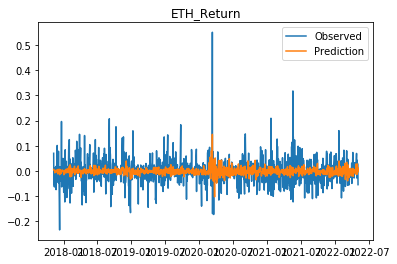

In [90]:
YETH=Data1['ETH_Return']
regressionETH = pd.DataFrame(YETH)
predictionETH = resultsETH.predict()
regressionETH['Prediction']=predictionETH
regressionETH.head()

plt.plot(regressionETH)
labels=['Observed','Prediction']
plt.legend(labels)
plt.title('ETH_Return')
plt.show;

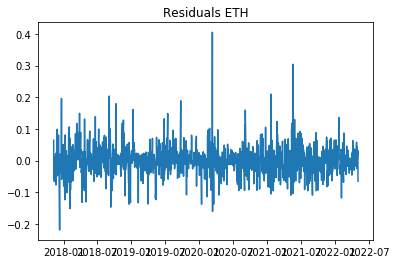

In [91]:
residualsETH = YETH - predictionETH
plt.plot(residualsETH)
plt.title('Residuals ETH')
plt.show;

In [92]:
BreushPagan_ETH = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']

test_BreushPagan_ETH = sms.het_breuschpagan(residualsETH, resultsETH.model.exog)
print(BreushPagan_ETH , test_BreushPagan_ETH)

['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'] (82.29085656440706, 4.69385087234607e-15, 12.61483470489505, 1.2474367542634437e-15)


### Bitcoin

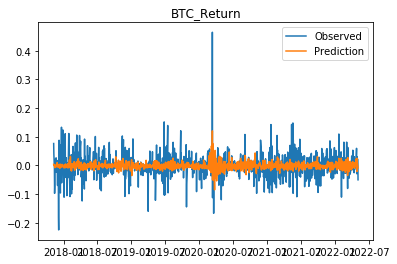

In [100]:
YBTC=Data1['BTC_Return']
regressionBTC = pd.DataFrame(YBTC)
predictionBTC = resultsBTC.predict()
regressionBTC['Prediction']=predictionBTC
regressionBTC.head()

plt.plot(regressionBTC)
labels=['Observed','Prediction']
plt.legend(labels)
plt.title('BTC_Return')
plt.show;

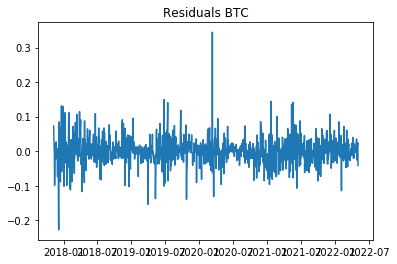

In [101]:
residualsBTC = YBTC - predictionBTC
plt.plot(residualsBTC)
plt.title('Residuals BTC')
plt.show;

In [102]:
BreushPagan_BTC = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']

test_BreushPagan_BTC = sms.het_breuschpagan(residualsBTC, resultsBTC.model.exog)
print(BreushPagan_BTC , test_BreushPagan_BTC)

['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'] (79.43595543577051, 1.1011386122691801e-15, 17.03149493240638, 3.02857278501302e-16)


### Cardano

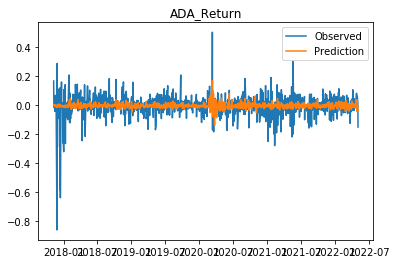

In [103]:
YADA=Data1['ADA_Return']
regressionADA = pd.DataFrame(YADA)
predictionADA = resultsADA.predict()
regressionADA['Prediction']=predictionADA
regressionADA.head()

plt.plot(regressionADA)
labels=['Observed','Prediction']
plt.legend(labels)
plt.title('ADA_Return')
plt.show;

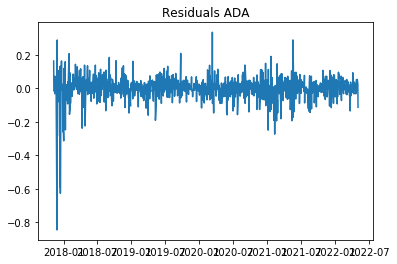

In [105]:
residualsADA = YADA - predictionADA
plt.plot(residualsADA)
plt.title('Residuals ADA')
plt.show;

Scatterplot erstellen

In [107]:
BreushPagan_ADA = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']

test_BreushPagan_ADA = sms.het_breuschpagan(residualsADA, resultsADA.model.exog)
print(BreushPagan_ADA , test_BreushPagan_ADA)

['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'] (1.0471295579791455, 0.9940320251472968, 0.148642647149499, 0.9941155429422144)


### Litecoin

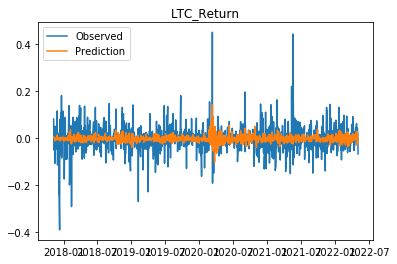

In [108]:
YLTC=Data1['LTC_Return']
regressionLTC = pd.DataFrame(YLTC)
predictionLTC = resultsLTC.predict()
regressionLTC['Prediction']=predictionLTC
regressionLTC.head()

plt.plot(regressionLTC)
labels=['Observed','Prediction']
plt.legend(labels)
plt.title('LTC_Return')
plt.show;

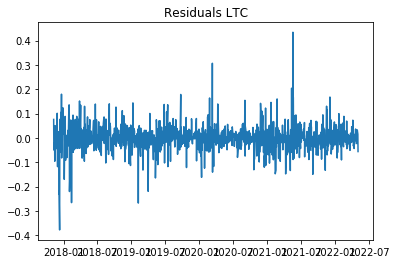

In [110]:
residualsLTC = YLTC - predictionLTC
plt.plot(residualsLTC)
plt.title('Residuals LTC')
plt.show;

In [111]:
BreushPagan_LTC = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']

test_BreushPagan_LTC = sms.het_breuschpagan(residualsLTC, resultsLTC.model.exog)
print(BreushPagan_LTC , test_BreushPagan_LTC)

['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'] (20.883724306213185, 0.0019249748256379845, 3.525443321301215, 0.00184322406233794)


### Stellar

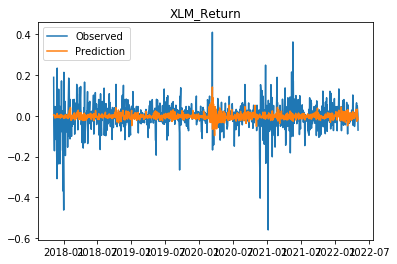

In [112]:
YXLM=Data1['XLM_Return']
regressionXLM = pd.DataFrame(YXLM)
predictionXLM = resultsXLM.predict()
regressionXLM['Prediction']=predictionXLM
regressionXLM.head()

plt.plot(regressionXLM)
labels=['Observed','Prediction']
plt.legend(labels)
plt.title('XLM_Return')
plt.show;






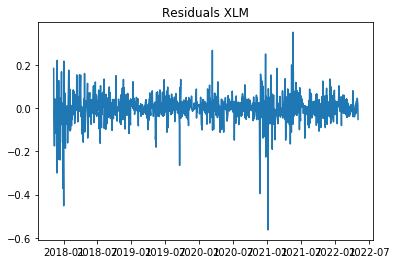

In [113]:
residualsXLM = YXLM - predictionXLM
plt.plot(residualsXLM)
plt.title('Residuals XLM')
plt.show;

In [114]:
BreushPagan_XLM = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']

test_BreushPagan_XLM = sms.het_breuschpagan(residualsXLM, resultsXLM.model.exog)
print(BreushPagan_XLM , test_BreushPagan_XLM)

['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'] (10.782001396260998, 0.09535216953749805, 1.8032455414607118, 0.09522264325703678)


### Ripple

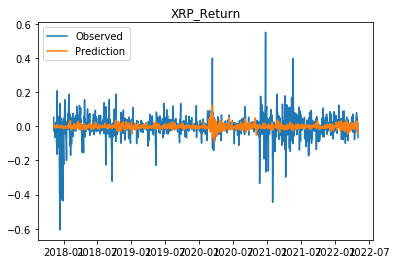

In [115]:
YXRP=Data1['XRP_Return']
regressionXRP = pd.DataFrame(YXRP)
predictionXRP = resultsXRP.predict()
regressionXRP['Prediction']=predictionXRP
regressionXRP.head()

plt.plot(regressionXRP)
labels=['Observed','Prediction']
plt.legend(labels)
plt.title('XRP_Return')
plt.show;

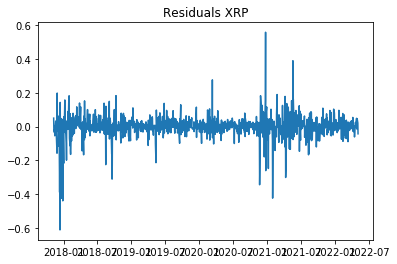

In [116]:
residualsXRP = YXRP - predictionXRP
plt.plot(residualsXRP)
plt.title('Residuals XRP')
plt.show;

In [117]:
BreushPagan_XRP = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']

test_BreushPagan_XRP = sms.het_breuschpagan(residualsXRP, resultsXRP.model.exog)
print(BreushPagan_XRP , test_BreushPagan_XRP)

['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'] (1.706246920006909, 0.9446379763915818, 0.2830025584029954, 0.9451365723558096)


## Binance

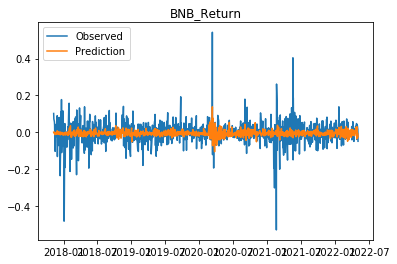

In [118]:
YBNB=Data1['BNB_Return']
regressionBNB = pd.DataFrame(YBNB)
predictionBNB = resultsBNB.predict()
regressionBNB['Prediction']=predictionBNB
regressionBNB.head()

plt.plot(regressionBNB)
labels=['Observed','Prediction']
plt.legend(labels)
plt.title('BNB_Return')
plt.show;

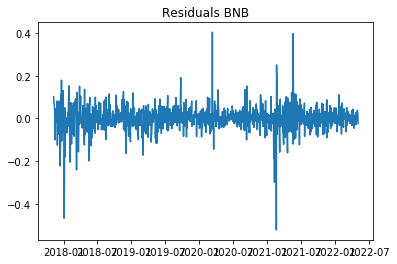

In [119]:
residualsBNB = YBNB - predictionBNB
plt.plot(residualsBNB)
plt.title('Residuals BNB')
plt.show;

In [120]:
BreushPagan_BNB= ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']

test_BreushPagan_BNB = sms.het_breuschpagan(residualsBNB, resultsBNB.model.exog)
print(BreushPagan_BNB , test_BreushPagan_BNB)

['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'] (18.206213048012888, 0.0197325106053433, 2.2951617207084767, 0.019370733071178283)


### Tron

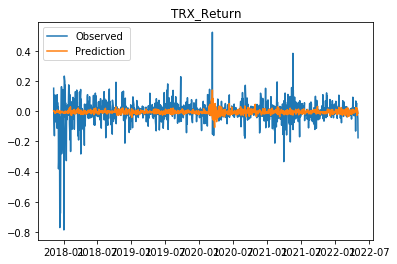

In [121]:
YTRX=Data1['TRX_Return']
regressionTRX = pd.DataFrame(YTRX)
predictionTRX = resultsTRX.predict()
regressionTRX['Prediction']=predictionTRX
regressionTRX.head()

plt.plot(regressionTRX)
labels=['Observed','Prediction']
plt.legend(labels)
plt.title('TRX_Return')
plt.show;

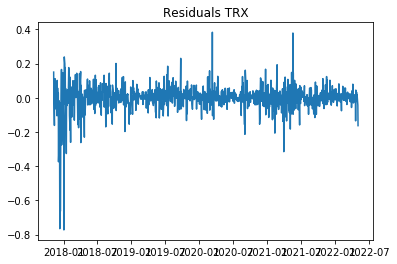

In [122]:
residualsTRX = YTRX - predictionTRX
plt.plot(residualsTRX)
plt.title('Residuals TRX')
plt.show;

In [123]:
BreushPagan_TRX= ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']

test_BreushPagan_TRX = sms.het_breuschpagan(residualsTRX, resultsTRX.model.exog)
print(BreushPagan_TRX , test_BreushPagan_TRX)

['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'] (1.5936632728143543, 0.9020145791783327, 0.31745287026151436, 0.9026620016605076)


### Chainlink

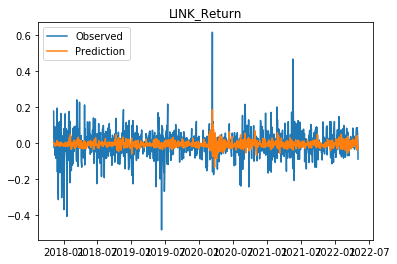

In [124]:
YLINK=Data1['LINK_Return']
regressionLINK = pd.DataFrame(YLINK)
predictionLINK = resultsLINK.predict()
regressionLINK['Prediction']=predictionLINK
regressionLINK.head()

plt.plot(regressionLINK)
labels=['Observed','Prediction']
plt.legend(labels)
plt.title('LINK_Return')
plt.show;

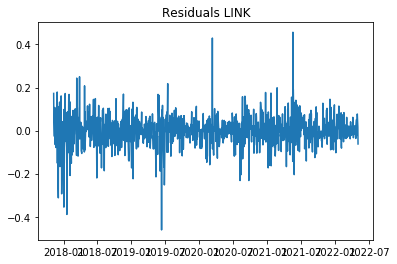

In [125]:
residualsLINK = YLINK- predictionLINK
plt.plot(residualsLINK)
plt.title('Residuals LINK')
plt.show;

In [126]:
BreushPagan_LINK= ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']

test_BreushPagan_LINK = sms.het_breuschpagan(residualsLINK, resultsLINK.model.exog)
print(BreushPagan_LINK , test_BreushPagan_LINK)

['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'] (25.517643535833244, 0.0002737377646797419, 4.326304103235324, 0.000253082859096587)


### Dogecoin

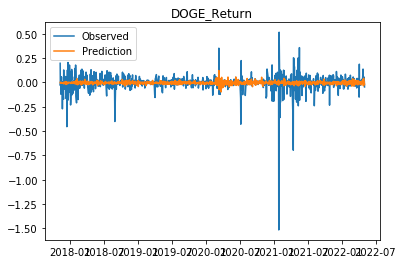

In [127]:
YDOGE=Data1['DOGE_Return']
regressionDOGE = pd.DataFrame(YDOGE)
predictionDOGE = resultsDOGE.predict()
regressionDOGE['Prediction']=predictionDOGE
regressionDOGE.head()

plt.plot(regressionDOGE)
labels=['Observed','Prediction']
plt.legend(labels)
plt.title('DOGE_Return')
plt.show;

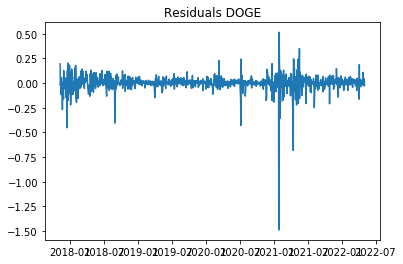

In [128]:
residualsDOGE = YDOGE- predictionDOGE
plt.plot(residualsDOGE)
plt.title('Residuals DOGE')
plt.show;

In [129]:
BreushPagan_DOGE= ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']

test_BreushPagan_DOGE = sms.het_breuschpagan(residualsDOGE, resultsDOGE.model.exog)
print(BreushPagan_DOGE , test_BreushPagan_DOGE)

['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'] (7.508002546088453, 0.3779663467831668, 1.0720883232558043, 0.379118457955245)


### Conclusion Homo-& Heteroscedasticity

Write down conclusion!

## --------------------------------------------------------------------------------------------------------

## Autocorrelation - Durbin Watson


$H_0:$𝜌 = 0   (no positive or negative autocorrelation)

$H_1:$ 𝜌 ≠ 0  (positive or negative autocorrelation) 1


0 ≤ 𝑑 ≤ 4

- 𝑑 should be close to 2 if 𝐻 is true (𝜌 ≈ 0)
- 𝑑 < 2 may signal positive autocorrelation (0 < 𝜌 ≤ 1)
- 𝑑 > 2 may signal negative autocorrelation (−1 ≤ 𝜌 < 0)

In [138]:
dw_pvalueLTC=sm.stats.stattools.durbin_watson(residualsLTC)
dw_pvalueETH=sm.stats.stattools.durbin_watson(residualsETH)
dw_pvalueXLM=sm.stats.stattools.durbin_watson(residualsXLM)
dw_pvalueLINK=sm.stats.stattools.durbin_watson(residualsLINK)
dw_pvalueDOGE=sm.stats.stattools.durbin_watson(residualsDOGE)
dw_pvalueXRP=sm.stats.stattools.durbin_watson(residualsXRP)
dw_pvalueBTC=sm.stats.stattools.durbin_watson(residualsBTC)
dw_pvalueADA=sm.stats.stattools.durbin_watson(residualsADA)
dw_pvalueTRX=sm.stats.stattools.durbin_watson(residualsTRX)
dw_pvalueBNB=sm.stats.stattools.durbin_watson(residualsBNB)

print("\n","LTC-Durbin-Watson Test", dw_pvalueLTC)
print("\n","ETH-Durbin-Watson Test", dw_pvalueETH)
print("\n","XLM-Durbin-Watson Test", dw_pvalueXLM)
print("\n","LINK-Durbin-Watson Test", dw_pvalueLINK)
print("\n","DOGE-Durbin-Watson Test", dw_pvalueDOGE)
print("\n","XRP-Durbin-Watson Test", dw_pvalueXRP)
print("\n","BTC-Durbin-Watson Test", dw_pvalueBTC)
print("\n","ADA-Durbin-Watson Test", dw_pvalueADA)
print("\n","TRX-Durbin-Watson Test", dw_pvalueTRX)
print("\n","BNB-Durbin-Watson Test", dw_pvalueBNB)


 LTC-Durbin-Watson Test 1.9781110394798305

 ETH-Durbin-Watson Test 2.117923130710392

 XLM-Durbin-Watson Test 2.0753725492939585

 LINK-Durbin-Watson Test 2.1138759564265985

 DOGE-Durbin-Watson Test 1.848456369312354

 XRP-Durbin-Watson Test 1.9486594152718695

 BTC-Durbin-Watson Test 1.9986029121376323

 ADA-Durbin-Watson Test 2.1972616003805663

 TRX-Durbin-Watson Test 1.8513154983449918

 BNB-Durbin-Watson Test 1.948571084414563


### Results and Conclusion

- LTC  **no autocorrelation**
- ETH  **no autocorrelation**
- XLM  **no autocorrelation**
- LINK **no autocorelation**
- DOGE **no autocorrelation**
- XRP  **no autocorrelation**
- BTC  **no autocorrelation**
- ADA  **no autocorrelation**
- TRX  **no autocorrelation**
- BNB  **no autocorrelation**


The test unveils that there is not positive or negative autocorrelation.